<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec  Python
</h2>
</div>

### La FAO réalise une importante étude sur l'alimentation dans le monde plus particulierement la sous nutrition. Ce notebook vise à produire les differentes analyses selon les données de 2013 à 2017.

##### Les données à notre disposition sont 4 fichiers CSV
###### - La population mondiale de 2013 à 2017 (démographie)
###### - La disponibilité alimentaire en 2017
###### - l'aide alimentaire
###### - la sous nutrition 

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [6]:
#Import des librairies neccessaires à la completion du projet
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Mise en place de la palette de couleurs pour les graphiques
sns.set_palette("hls",8)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [8]:
#Importation du fichier population.csv
pop = pd.read_csv('data_raw/population.csv',encoding='utf-8')

#Importation du fichier dispo_alimentaire.csv
dispo = pd.read_csv('data_raw/dispo_alimentaire.csv',encoding='utf-8')

#Importation du fichier aide_alimentaire.csv
aide = pd.read_csv('data_raw/aide_alimentaire.csv',encoding='utf-8')

#Importation du fichier sous_nutrition.csv
sousnut = pd.read_csv('data_raw/sous_nutrition.csv',encoding='utf-8')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)" .format(pop.shape[0]))
print("Le tableau comporte {} colonne(s)".format(pop.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [12]:
#La nature des données dans chacune des colonnes
types_de_donnees= pop.dtypes
print(types_de_donnees)

Zone       object
Année       int64
Valeur    float64
dtype: object


In [13]:
#pour faire plus simple
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [14]:
#Consulter le nombre de valeurs présentes dans chacune des colonnes

print(pop['Zone'].value_counts())
print('Il y a', len(pop['Zone'].value_counts()), 'valeurs différentes dans la colonne', pop.columns[0],'.')

print(pop['Année'].value_counts())
print('Il y a', len(pop['Année'].value_counts()), 'années différentes dans la colonne', pop.columns[1],'.')

print(pop['Valeur'].value_counts())
print('Il y a', len(pop['Valeur'].value_counts()), 'valeurs différentes dans la colonne', pop.columns[2],'.')

Zone
Afghanistan                               6
Afrique du Sud                            6
Albanie                                   6
Algérie                                   6
Allemagne                                 6
                                         ..
Venezuela (République bolivarienne du)    6
Viet Nam                                  6
Yémen                                     6
Zambie                                    6
Zimbabwe                                  6
Name: count, Length: 236, dtype: int64
Il y a 236 valeurs différentes dans la colonne Zone .
Année
2013    236
2014    236
2015    236
2016    236
2017    236
2018    236
Name: count, dtype: int64
Il y a 6 années différentes dans la colonne Année .
Valeur
0.801        3
1.609        2
36296.113    1
285.510      1
39728.025    1
            ..
93640.422    1
94600.648    1
95545.962    1
25147.109    1
33370.794    1
Name: count, Length: 1413, dtype: int64
Il y a 1413 valeurs différentes dans la colonne Va

In [15]:
#Affichage des 5 premieres lignes de la table
display(pop.head())

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [16]:
#Trier le nombre d'habitants par pays et par an en milliers d'habitants
pop.pivot_table(index='Zone', columns='Année', values='Valeur', aggfunc="sum",observed=False)

Année,2013,2014,2015,2016,2017,2018
Zone,,,,,,
Afghanistan,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
Afrique du Sud,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518
Albanie,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740
Algérie,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408
Allemagne,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418
...,...,...,...,...,...,...
Îles Salomon,571.336,587.079,603.118,619.438,636.039,652.857
Îles Turques-et-Caïques,34.731,35.369,35.981,36.559,37.115,37.665
Îles Vierges américaines,105.303,105.114,104.958,104.835,104.751,104.680


In [17]:
#Verification de l'exhaustivite des donnees - localisation des valeurs manquantes
rows_with_nan = pop[pop.isnull().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Zone, Année, Valeur]
Index: []


#### Il n'y a aucune valeur manquante dans ce dataframe

In [19]:
#Affichage les 5 premières lignes de la table
pop.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [20]:
# Harmoniser les unités en multipliant la colonne valeur par 1000
pop['Valeur'] = pop['Valeur'] * 1000
# Afficher le DataFrame après harmonisation
print("\nLe DataFrame après harmonisation des unités :")
print(pop)


Le DataFrame après harmonisation des unités :
             Zone  Année      Valeur
0     Afghanistan   2013  32269589.0
1     Afghanistan   2014  33370794.0
2     Afghanistan   2015  34413603.0
3     Afghanistan   2016  35383032.0
4     Afghanistan   2017  36296113.0
...           ...    ...         ...
1411     Zimbabwe   2014  13586707.0
1412     Zimbabwe   2015  13814629.0
1413     Zimbabwe   2016  14030331.0
1414     Zimbabwe   2017  14236595.0
1415     Zimbabwe   2018  14438802.0

[1416 rows x 3 columns]


In [21]:
#Changer le nom de la colonne Valeur par Population
pop.rename(columns={'Valeur':'Population'}, inplace=True)

In [22]:
#Harmoniser les noms de pays entre les fichiers
dico_zonepop={'Chine, continentale':"Chine",'République de Corée':"Corée du Sud",'République populaire démocratique de Corée' :"Corée du Nord"}
pop['Zone']=pop['Zone'].replace(dico_zonepop)
verif = pop[pop['Zone'].str.contains('Chine|Corée du Sud|Corée du Nord')]
verif['Zone']

246      Chine - RAS de Hong-Kong
247      Chine - RAS de Hong-Kong
248      Chine - RAS de Hong-Kong
249      Chine - RAS de Hong-Kong
250      Chine - RAS de Hong-Kong
251      Chine - RAS de Hong-Kong
252          Chine - RAS de Macao
253          Chine - RAS de Macao
254          Chine - RAS de Macao
255          Chine - RAS de Macao
256          Chine - RAS de Macao
257          Chine - RAS de Macao
258                         Chine
259                         Chine
260                         Chine
261                         Chine
262                         Chine
263                         Chine
264     Chine, Taiwan Province de
265     Chine, Taiwan Province de
266     Chine, Taiwan Province de
267     Chine, Taiwan Province de
268     Chine, Taiwan Province de
269     Chine, Taiwan Province de
1056                 Corée du Sud
1057                 Corée du Sud
1058                 Corée du Sud
1059                 Corée du Sud
1060                 Corée du Sud
1061          

In [23]:
#verification de l'unicite des noms des pays dans le fichier de population
pop['Zone'].unique().tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Andorre',
 'Angola',
 'Anguilla',
 'Antigua-et-Barbuda',
 'Antilles néerlandaises (ex)',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Aruba',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bahreïn',
 'Bangladesh',
 'Barbade',
 'Bélarus',
 'Belgique',
 'Belize',
 'Bénin',
 'Bermudes',
 'Bhoutan',
 'Bolivie (État plurinational de)',
 'Bonaire, Saint-Eustache et Saba',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brésil',
 'Brunéi Darussalam',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine',
 'Chine, Taiwan Province de',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatie',
 'Cuba',
 'Curaçao',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Égypte',
 'El Salvador',
 'Émirats arabes unis',
 'Équateur',
 'Érythrée',
 'Espagne',
 'Estonie',
 'Eswatini',
 "États-Un

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [25]:
#Afficher la dimension du dataframe et le type de données pour chaque colonne
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

##### Il semble que la colonne variation de stock ne soit pas pris en compte dans le lexique de la dataframe car celui-ci mentionne 17 variables.

In [27]:
#Récupérer le nombre de pays différents présents dans le dataset colonne Zone
print(dispo['Zone'].value_counts())
print('Il y a', len(dispo['Zone'].value_counts()), 'pays différents dans la colonne', dispo.columns[0],'.')

Zone
Inde                                          97
Japon                                         97
Costa Rica                                    96
Chine - RAS de Hong-Kong                      96
Canada                                        96
                                              ..
Timor-Leste                                   61
République populaire démocratique de Corée    61
Afghanistan                                   60
Turkménistan                                  57
Lesotho                                       53
Name: count, Length: 174, dtype: int64
Il y a 174 pays différents dans la colonne Zone .


In [28]:
#Récupérer le nombres de produits différents présents dans le dataset
print(dispo['Produit'].value_counts())
print('Il y a', len(dispo['Produit'].value_counts()), 'produits différents dans la colonne', dispo.columns[1],'.')

Produit
Abats Comestible          174
Beurre, Ghee              174
Lait - Excl Beurre        174
Boissons Alcooliques      174
Blé                       174
                         ... 
Sucre, betterave          107
Ignames                    80
Sucre non centrifugé       30
Huile de Son de Riz        21
Viande de Anim Aquatiq      3
Name: count, Length: 98, dtype: int64
Il y a 98 produits différents dans la colonne Produit .


In [29]:
#Remplacer les NaN dans le dataset par des 0
dispo.fillna(0, inplace=True)
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Multiplier toutes les lignes contenant des milliers de tonnes pour les mettre en Kg (* 1 000 000)
var_transforme=['Aliments pour animaux', 'Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']
dispo[var_transforme] = dispo[var_transforme].apply(lambda x: x * 1000000)

In [31]:
#Harmoniser les noms de pays entre les fichiers
dico_zonepop={'Chine, continentale':"Chine",'République de Corée':"Corée du Sud",'République populaire démocratique de Corée' :"Corée du Nord"}
dispo['Zone']=dispo['Zone'].replace(dico_zonepop)
verif = dispo[dispo['Zone'].str.contains('Chine|Corée du Sud|Corée du Nord')]
verif['Zone']

2992     Chine - RAS de Hong-Kong
2993     Chine - RAS de Hong-Kong
2994     Chine - RAS de Hong-Kong
2995     Chine - RAS de Hong-Kong
2996     Chine - RAS de Hong-Kong
                   ...           
12114               Corée du Nord
12115               Corée du Nord
12116               Corée du Nord
12117               Corée du Nord
12118               Corée du Nord
Name: Zone, Length: 533, dtype: object

In [32]:
#Afficher les 5 premières lignes de la table
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Verification de l'exhaustivite des donnees - localisation des valeurs manquantes dans le fichier 
# Nombre de valeurs manquantes par colonne
missing_counts = dispo.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_counts)

Nombre de valeurs manquantes par colonne :
Zone                                                             0
Produit                                                          0
Origine                                                          0
Aliments pour animaux                                            0
Autres Utilisations                                              0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production         

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [35]:
#Afficher la dimension du dataframe et le type de données pour chaque colonne
aide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [36]:
#Nb de valeurs différentes présentes dans la table
print(aide['Pays bénéficiaire'].value_counts())
print('Il y a', len(aide['Pays bénéficiaire'].value_counts()), 'pays différents dans la colonne', aide.columns[0],'.')
print(aide['Année'].value_counts())
print('Il y a', len(aide['Année'].value_counts()), 'années différentes répertoriées dans la colonne', aide.columns[1],'.')
print(aide['Produit'].value_counts())
print('Il y a', len(aide['Produit'].value_counts()), 'produits différents dans la colonne', aide.columns[2],'.')

Pays bénéficiaire
Algérie                            39
Yémen                              38
République arabe syrienne          38
Éthiopie                           33
Nicaragua                          33
                                   ..
Chine, continentale                 4
Zambie                              4
Bolivie (État plurinational de)     2
Égypte                              2
Comores                             2
Name: count, Length: 76, dtype: int64
Il y a 76 pays différents dans la colonne Pays bénéficiaire .
Année
2013    519
2014    461
2015    391
2016    104
Name: count, dtype: int64
Il y a 4 années différentes répertoriées dans la colonne Année .
Produit
Non-céréales                220
Céréales                    200
Huiles végétales            179
Légumineuses Sèches,Tot.    171
Riz, total                  147
Mélanges et préparations    142
Autres non-céréales         120
Sucre, total                 67
Céréales Secondaires         61
Blé et Farin           

In [37]:
#Verification de l'exhaustivite des donnees - localisation des valeurs manquantes dans le fichier 
# Nombre de valeurs manquantes par colonne
missing_counts = aide.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_counts)

Nombre de valeurs manquantes par colonne :
Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64


In [38]:
#Affichage les 5 premières lignes de la table
aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [39]:
#Changer le nom de la colonne Pays bénéficiaire par Zone
aide.rename(columns={'Pays bénéficiaire':'Zone'}, inplace=True)

In [40]:
#Multiplier la colonne Valeur qui contient des tonnes par 1000 pour avoir des kg
aide['Valeur']=aide['Valeur']*1000

In [41]:
#Harmoniser les noms de pays entre les fichiers
dico_zonepop={'Chine, continentale':"Chine",'République de Corée':"Corée du Sud",'République populaire démocratique de Corée' :"Corée du Nord"}
dispo['Zone']=dispo['Zone'].replace(dico_zonepop)
verif = dispo[dispo['Zone'].str.contains('Chine|Corée du Sud|Corée du Nord')]
verif['Zone']

2992     Chine - RAS de Hong-Kong
2993     Chine - RAS de Hong-Kong
2994     Chine - RAS de Hong-Kong
2995     Chine - RAS de Hong-Kong
2996     Chine - RAS de Hong-Kong
                   ...           
12114               Corée du Nord
12115               Corée du Nord
12116               Corée du Nord
12117               Corée du Nord
12118               Corée du Nord
Name: Zone, Length: 533, dtype: object

In [42]:
#Afficher les 5 premières lignes de la table
aide.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [44]:
#Afficher la dimension du dataframe et le type de données pour chaque colonne
sousnut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [45]:
#Verification de l'exhaustivite des donnees - localisation des valeurs manquantes dans le fichier 
# Nombre de valeurs manquantes par colonne
missing_counts = sousnut.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_counts)

Nombre de valeurs manquantes par colonne :
Zone        0
Année       0
Valeur    594
dtype: int64


In [46]:
#Nombre de valeurs différentes dans la colonne Valeur
sousnut['Valeur'].value_counts()
print('Il y a', len(sousnut['Valeur'].value_counts()), 'valeurs différentes dans la colonne', sousnut.columns[2],'.')

Il y a 139 valeurs différentes dans la colonne Valeur .


In [47]:
#Nombre de valeurs renseignées dans la colonne Valeur
nb_valeurs_renseignees = sousnut['Valeur'].count()
print(f'Il y a {nb_valeurs_renseignees} valeurs renseignées dans la table sous-nutrition.')

Il y a 624 valeurs renseignées dans la table sous-nutrition.


In [48]:
#Nombre de pays concernés
sousnut_pays=sousnut['Zone'].drop_duplicates()
len(sousnut_pays)
print('Il y a', len(sousnut_pays), 'pays différents dans la colonne', sousnut.columns[0],'.')

Il y a 203 pays différents dans la colonne Zone .


In [49]:
#Consulter la variable Année
print(sousnut['Année'].drop_duplicates())
print(f"Il y a {len(sousnut['Année'].value_counts())} intervalles temporels différents répertoriés dans la colonne {sousnut.columns[1]}.")

0    2012-2014
1    2013-2015
2    2014-2016
3    2015-2017
4    2016-2018
5    2017-2019
Name: Année, dtype: object
Il y a 6 intervalles temporels différents répertoriés dans la colonne Année.


In [50]:
#Convertir la colonne sous nutrition en numérique avec transformation des valeurs qui ne sont pas des nombres (<0.1) en NaN.
sousnut['Valeur'] = pd.to_numeric(sousnut['Valeur'], errors='coerce')

In [51]:
#PRemplacer les NaN en 0
sousnut= sousnut.fillna(0)

In [52]:
#Changer le nom de la colonne Valeur par sous-nutrition
sousnut.rename(columns={'Valeur':'sous_nutrition'}, inplace=True)

In [53]:
#Multiplier la colonne sous-nutrition exprimée en nombre de personnes concernées par 1 000 000
sousnut['sous_nutrition']=sousnut['sous_nutrition']*1000000

In [54]:
#Harmoniser les noms de pays entre les fichiers
dico_zonepop={'Chine, continentale':"Chine",'République de Corée':"Corée du Sud",'République populaire démocratique de Corée' :"Corée du Nord"}
sousnut['Zone']=sousnut['Zone'].replace(dico_zonepop)
verif = sousnut[sousnut['Zone'].str.contains('Chine|Corée du Sud|Corée du Nord')]
verif['Zone']

222     Chine - RAS de Hong-Kong
223     Chine - RAS de Hong-Kong
224     Chine - RAS de Hong-Kong
225     Chine - RAS de Hong-Kong
226     Chine - RAS de Hong-Kong
227     Chine - RAS de Hong-Kong
228         Chine - RAS de Macao
229         Chine - RAS de Macao
230         Chine - RAS de Macao
231         Chine - RAS de Macao
232         Chine - RAS de Macao
233         Chine - RAS de Macao
234                        Chine
235                        Chine
236                        Chine
237                        Chine
238                        Chine
239                        Chine
240    Chine, Taiwan Province de
241    Chine, Taiwan Province de
242    Chine, Taiwan Province de
243    Chine, Taiwan Province de
244    Chine, Taiwan Province de
245    Chine, Taiwan Province de
912                 Corée du Sud
913                 Corée du Sud
914                 Corée du Sud
915                 Corée du Sud
916                 Corée du Sud
917                 Corée du Sud
942       

In [55]:
#Afficher les 5 premières lignes de la table
sousnut.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [56]:
# Filtrer les zones avec des valeurs de sous-nutrition manquantes
sn_1 = sousnut.loc[sousnut['sous_nutrition'].isnull(), ['Zone']]
sn_1_list = sn_1.groupby('Zone').size()  # Compte des occurrences par zone

In [57]:
# Filtrer les zones avec des valeurs de sous-nutrition présentes
sn_2 = sousnut.loc[sousnut['sous_nutrition'].notnull(), ['Zone']]
sn_2_list = sn_2.groupby('Zone').size()  # Compte des occurrences par zone

In [58]:
# Afficher les résultats
print("Liste des pays où les valeurs de sous-nutrition manquent:\n", sn_1_list.index.values.tolist(), "\n")
print(len(sn_1_list), "pays sur", len(sousnut['Zone'].unique()), "ont des valeurs totalement manquantes.\n")
print("Liste des pays ayant des valeurs de sous-nutrition au moins partielles:\n", sn_2_list.index.values.tolist(), "\n")
print(len(sn_2_list), "pays sur", len(sousnut['Zone'].unique()), "ont des valeurs au moins partielles.\n")


Liste des pays où les valeurs de sous-nutrition manquent:
 [] 

0 pays sur 203 ont des valeurs totalement manquantes.

Liste des pays ayant des valeurs de sous-nutrition au moins partielles:
 ['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne', 'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores', 'Congo', 'Corée du Nord', 'Corée du Sud', 'Costa Rica', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fid

In [59]:
# Calculer le nombre de pays qui ont des valeurs partielles
total_unique_zones = len(sousnut['Zone'].unique())
partial_countries_count = total_unique_zones - len(sn_1_list)
print(partial_countries_count, "pays sur", total_unique_zones, "ont des valeurs partielles.")

203 pays sur 203 ont des valeurs partielles.


In [60]:
#Afficher les 5 premières lignes de la table
sousnut.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3- Manipulations des données</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [63]:
# Faire une jointure entre la table population et la table sous-nutrition, en ciblant l'année 2017
pop_2017=pop.loc[(pop["Année"] == 2017), :]
sousnut_2017=sousnut.loc[(sousnut['Année']== '2016-2018'),:]
pop_sousnut=pd.merge(sousnut_2017[['Zone','sous_nutrition']],pop_2017,on="Zone",how="inner")

In [64]:
#Afficher les 1ères lignes du dataset
pop_sousnut.head()

,Zone,sous_nutrition,Année,Population
0,Afghanistan,10500000.0,2017,36296113.0
1,Afrique du Sud,3100000.0,2017,57009756.0
2,Albanie,100000.0,2017,2884169.0
3,Algérie,1300000.0,2017,41389189.0
4,Allemagne,0.0,2017,82658409.0


In [65]:
#Calculer et afficher le nombre de personnes en état de sous-nutrition : somme de la colonne sous-nutrition
sousnut_poptotale= pop_sousnut['sous_nutrition'].sum()
pct_popsousnut= round(((pop_sousnut['sous_nutrition'].sum())/(pop_sousnut['Population'].sum()))*100,2)
print('Il y a', sousnut_poptotale, 'personnes en état de sous-nutrition dans le monde en 2017. Cela représente', pct_popsousnut,'% de la population mondiale.')

Il y a 535700000.0 personnes en état de sous-nutrition dans le monde en 2017. Cela représente 7.1 % de la population mondiale.


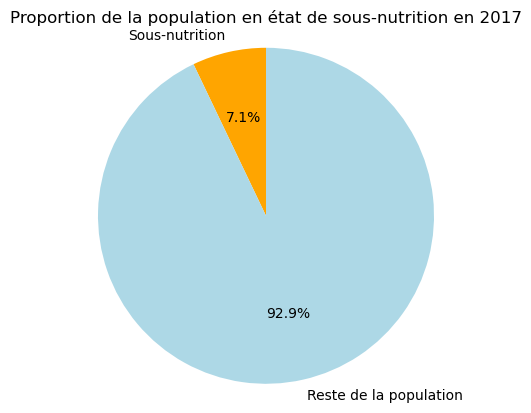

In [66]:
# Création du graphique circulaire
valeurs = [sousnut_poptotale, pop_sousnut['Population'].sum() - sousnut_poptotale]
labels = ['Sous-nutrition', 'Reste de la population']
plt.pie(valeurs, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue'])
plt.axis('equal')  # Pour un cercle parfait
plt.title('Proportion de la population en état de sous-nutrition en 2017')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

#### La consommation alimentaire mondiale moyenne est d’environ 2 650 kcal par jour et entre 2 et 2,5 kg de nourriture par jour, mais avec de grandes différences régionales selon l’accès, les habitudes et le niveau de vie.
#### Ce chiffre masque de fortes disparités : dans les pays développés, la moyenne dépasse souvent 3 000 kcal/jour, tandis qu’en Afrique subsaharienne ou dans certains pays en développement, elle reste parfois autour de 2 100 à 2 400 kcal/jour
#### Source : https://www.fao.org/4/y3557f/y3557f15.htm
#### Source :https://www.ciwf.fr/actualites/2013/07/nourrir-9-milliards-habitants

#### Définition de la sous nutrition:
#### Apport alimentaire insuffisant en quantité ou en diversité pour répondre aux besoins de l’organisme, empêchant de mener une vie normale, active et saine.



In [70]:
#Faire une jointure entre le data frame population et Dispo alimentaire afin d'ajouter dans ce dernier la population
dispo_pop=pd.merge(dispo,pop_2017[['Zone','Population']],on="Zone",how="inner")

In [71]:
#Afficher le nouveau dataframe
dispo_pop.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


In [72]:
#Créér la colonne dispo_kcal avec le calcul des kcal disponibles mondialement 
dispo_pop['dispo_kcal']=dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_pop['Population'] 
dispo_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,145184452.0


In [73]:
print(dispo_pop.groupby(['Zone'])['dispo_kcal'].sum())

Zone
Afghanistan              7.574999e+10
Afrique du Sud           1.721695e+11
Albanie                  9.194731e+09
Algérie                  1.362946e+11
Allemagne                2.895524e+11
                             ...     
Émirats arabes unis      3.107059e+10
Équateur                 3.937846e+10
États-Unis d'Amérique    1.196962e+12
Éthiopie                 2.265254e+11
Îles Salomon             1.515681e+09
Name: dispo_kcal, Length: 172, dtype: float64


In [74]:
#Calculer le nombre total de calories disponibles mondialement pour une année
total_kcaldispo = dispo_pop['dispo_kcal'].sum()*365
print('Le nombre total de kilocalories disponibles mondialement en 2017 est de', total_kcaldispo,'kcal.')

Le nombre total de kilocalories disponibles mondialement en 2017 est de 7635429388975815.0 kcal.


In [75]:
#Calculer le nombre d'humains pouvant être nourris considérant une ration moyenne alimentaire nécessaire de 2650kcal/personne/jour
nbHumainsNourris = round(total_kcaldispo/(2650*365))
print("Le nombre d'humains pouvant être nourris pendant un an est de", nbHumainsNourris, 'personnes en 2017.')

Le nombre d'humains pouvant être nourris pendant un an est de 7893956463 personnes en 2017.


In [76]:
#somme population mondiale 2017
# Filtrer les données pour l'année 2017
pop_2017 = pop[pop['Année'] == 2017]
# Calculer la population totale pour l'année 2017
pop_totale_2017 = pop_2017['Population'].sum()
pop_totale_2017_milliards = pop_totale_2017 / 1_000_000_000
print(f"La population mondiale en 2017 est de {pop_totale_2017_milliards:.2f} milliards")

La population mondiale en 2017 est de 7.55 milliards


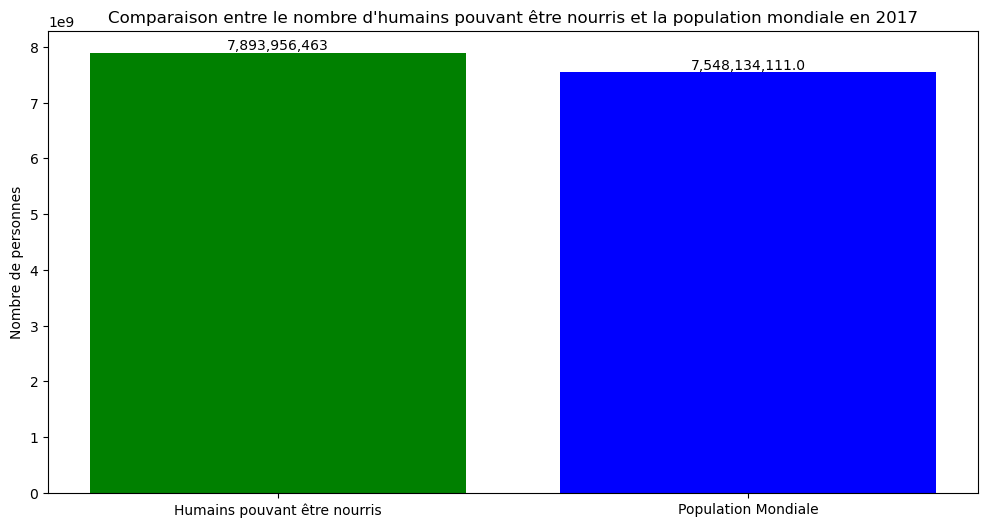

In [77]:
# Données pour le graphique
categories = ['Humains pouvant être nourris', 'Population Mondiale']
valeurs = [nbHumainsNourris, pop_totale_2017]
# Création du graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(categories, valeurs, color=['green', 'blue'])
plt.ylabel('Nombre de personnes')
plt.title('Comparaison entre le nombre d\'humains pouvant être nourris et la population mondiale en 2017')
plt.xticks(rotation=0)
# Afficher les valeurs sur les barres
for index, value in enumerate(valeurs):
    plt.text(index, value, f'{value:,}', ha='center', va='bottom')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [79]:
#Transférer les données avec les végétaux dans un nouveau dataframe
dispo_Vegt=dispo_pop.loc[(dispo_pop['Origine']=='vegetale'),:]
dispo_Vegt.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,145184452.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.0


In [80]:
#Calculer le nombre de kcal disponibles pour les végétaux
total_kcaldispoVegt = dispo_Vegt['dispo_kcal'].sum()*365
prop_kcaldispoVegt= round((total_kcaldispoVegt*100/total_kcaldispo),2)
print("Le nombre total de kilocalories d'origine végétale disponibles mondialement en 2017 est de", total_kcaldispoVegt, "kcal. Cela représente",prop_kcaldispoVegt,"% de l'ensemble des kilocalories disponibles mondialement.")

Le nombre total de kilocalories d'origine végétale disponibles mondialement en 2017 est de 6300178937197865.0 kcal. Cela représente 82.51 % de l'ensemble des kilocalories disponibles mondialement.


In [81]:
#Calculer le nombre d'humains pouvant être nourris avec les végétaux
nbHumainsNourrisVegt = round(total_kcaldispoVegt/(2650*365))
print(f"Le nombre d'humains pouvant être nourris pendant un an grâce aux produits d'origine végétale est de {nbHumainsNourrisVegt} personnes en 2017.")

Le nombre d'humains pouvant être nourris pendant un an grâce aux produits d'origine végétale est de 6513495929 personnes en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [83]:
#Calculer la disponibilité totale
total_dispo_interieure = dispo_pop['Disponibilité intérieure'].sum()
print(f'La disponibilité intérieure mondiale totale en 2017 est de {total_dispo_interieure} kg.')

La disponibilité intérieure mondiale totale en 2017 est de 9733927000000.0 kg.


In [84]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures

# Liste des colonnes à afficher
globalfood= ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture','Pertes','Semences','Traitement']

# Création de la boucle for pour afficher les valeurs
for colonne in globalfood:
    if colonne in dispo_pop.columns: 
        print(f"Valeurs de la colonne '{colonne}':")
        print(dispo_pop[colonne].dropna())  # Affiche les valeurs non nulles
        print()  # Ligne vide pour espacer les affichages
    else:
        print(f"La colonne '{colonne}' n'existe pas dans le DataFrame.")

Valeurs de la colonne 'Aliments pour animaux':
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15411    0.0
15412    0.0
15413    0.0
15414    0.0
15415    0.0
Name: Aliments pour animaux, Length: 15416, dtype: float64

Valeurs de la colonne 'Autres Utilisations':
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15411    0.0
15412    0.0
15413    0.0
15414    0.0
15415    0.0
Name: Autres Utilisations, Length: 15416, dtype: float64

Valeurs de la colonne 'Nourriture':
0        53000000.0
1        39000000.0
2         2000000.0
3               0.0
4        82000000.0
            ...    
15411     3000000.0
15412     2000000.0
15413           0.0
15414           0.0
15415           0.0
Name: Nourriture, Length: 15416, dtype: float64

Valeurs de la colonne 'Pertes':
0              0.0
1        2000000.0
2              0.0
3              0.0
4              0.0
           ...    
15411          0.0
15412          0.0
15413          

In [85]:
#Calcul des sommes pour chaque colonnes

# Dictionnaire pour stocker les sommes
sommes = {}
# Calcul des sommes pour chaque colonne
for colonne in globalfood:
    if colonne in dispo_pop.columns:  
        somme_colonne = dispo_pop[colonne].sum()  
        sommes[colonne] = somme_colonne  
        print(f"La somme totale de la colonne '{colonne}' est {somme_colonne} kg.")  
    else:
        print(f"La colonne '{colonne}' n'existe pas dans le DataFrame.")

# Calculer la somme totale de toutes les colonnes
somme_totale = sum(sommes.values())
print(f"Somme totale des variables : {somme_totale} kg.")

La somme totale de la colonne 'Aliments pour animaux' est 1288002000000.0 kg.
La somme totale de la colonne 'Autres Utilisations' est 858771000000.0 kg.
La somme totale de la colonne 'Nourriture' est 4805525000000.0 kg.
La somme totale de la colonne 'Pertes' est 452283000000.0 kg.
La somme totale de la colonne 'Semences' est 153317000000.0 kg.
La somme totale de la colonne 'Traitement' est 2185641000000.0 kg.
Somme totale des variables : 9743539000000.0 kg.


In [86]:
#Calculer la répartition de la disponibilité intérieure entre les différentes variables
for colonne in globalfood:
    repartition_globalfood=(round(dispo_pop[colonne].sum()*100/dispo_pop['Disponibilité intérieure'].sum()))
    print(f"La part de la colonne {colonne} représente {repartition_globalfood} % de la disponibilité intérieure.")

La part de la colonne Aliments pour animaux représente 13 % de la disponibilité intérieure.
La part de la colonne Autres Utilisations représente 9 % de la disponibilité intérieure.
La part de la colonne Nourriture représente 49 % de la disponibilité intérieure.
La part de la colonne Pertes représente 5 % de la disponibilité intérieure.
La part de la colonne Semences représente 2 % de la disponibilité intérieure.
La part de la colonne Traitement représente 22 % de la disponibilité intérieure.


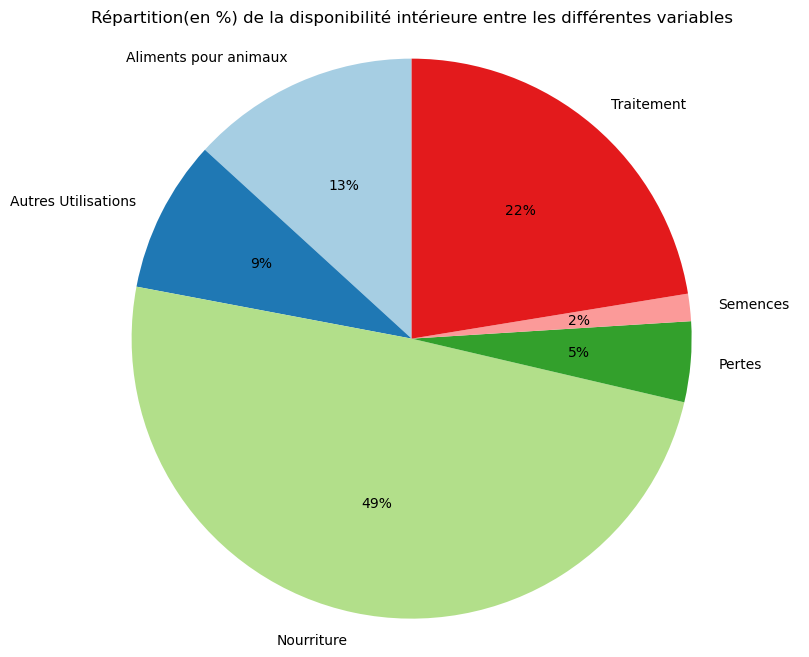

In [87]:
# Visualisation du pourcentage des variables 
labels = []
values = []

# Boucle pour calculer la part de chaque colonne par rapport à la disponibilité intérieure
for colonne in globalfood:
    part_colonne = dispo_pop[colonne].sum()  # Somme de la colonne
    total_dispo_interieure = dispo_pop['Disponibilité intérieure'].sum()  # Somme de la disponibilité intérieure
    repartition_globalfood = round((part_colonne * 100) / total_dispo_interieure, 2)
    # Stocker les étiquettes et les valeurs à l'intérieur de la boucle
    labels.append(colonne)
    values.append(repartition_globalfood)
 

# Création du graphique circulaire
plt.figure(figsize=(10, 8))  # Taille du graphique
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Pour un cercle parfait
plt.title('Répartition(en %) de la disponibilité intérieure entre les différentes variables')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

## Définition des céréales et produits céréaliers selon la FAO

La FAO (Organisation des Nations Unies pour l’alimentation et l’agriculture) définit les céréales comme des plantes annuelles, principalement de la famille des graminées (Poacées), cultivées pour leurs grains riches en amidon, utilisés pour l’alimentation humaine, animale, comme semence ou à des fins industrielles[^3]. Les céréales constituent le groupe de produits végétaux le plus important au niveau mondial, fournissant principalement des hydrates de carbone, avec également des protéines et peu de matières grasses[^3].

**Principales céréales incluses par la FAO :**

- Blé (incluant blé tendre, blé dur, épeautre, etc.)
- Riz (principalement riz asiatique)
- Maïs
- Orge
- Avoine
- Seigle
- Millet
- Sorgho
- Triticale (hybride de blé et de seigle)
- Sarrasin (bien que n’étant pas une graminée, il est inclus dans les statistiques FAO comme pseudo-céréale)[^3][^5]

La FAO distingue les céréales des légumineuses et autres plantes riches en protéines, mais inclut parfois des pseudo-céréales comme le sarrasin dans ses analyses de marché[^3][^5].

## Produits céréaliers

Les produits céréaliers, selon la FAO, englobent non seulement les grains entiers mais aussi les produits transformés issus de ces grains, tels que :

- Farines et semoules
- Flocons
- Pâtes alimentaires
- Aliments pour animaux (issues de céréales)
- Produits industriels (éthanol, biocarburants, etc.)[^3][^4]


## Synthèse des principales céréales dans les analyses FAO

| Céréale | Famille botanique | Utilisations principales |
| :-- | :-- | :-- |
| Blé | Graminées (Poacées) | Pain, pâtes, semoules, alimentation animale |
| Riz | Graminées (Poacées) | Consommation humaine (riz blanc, complet) |
| Maïs | Graminées (Poacées) | Alimentation humaine, animale, industrie |
| Orge | Graminées (Poacées) | Bière, alimentation animale, semoules |
| Avoine | Graminées (Poacées) | Flocons, alimentation animale |
| Seigle | Graminées (Poacées) | Pain, alcool, alimentation animale |
| Millet | Graminées (Poacées) | Consommation humaine, alimentation animale |
| Sorgho | Graminées (Poacées) | Alimentation humaine, animale, industrie |
| Sarrasin | Polygonacées | Pâtes, galettes, pseudo-céréale |

## Points clés pour une analyse de données selon la FAO

- Les analyses de la FAO sur les céréales incluent systématiquement le blé, le riz, le maïs et les céréales secondaires (orge, avoine, seigle, millet, sorgho, triticale, sarrasin)[^2][^3].
- Les légumineuses (lentilles, pois, haricots) et autres graines riches en protéines ne sont pas incluses dans la catégorie « céréales » mais peuvent être analysées séparément[^3].
- Les produits dérivés et transformés des céréales sont également pris en compte dans les statistiques et analyses de marché de la FAO[^3][^4].

En résumé, pour une analyse de données conforme aux classifications de la FAO, il convient d’inclure toutes les céréales majeures citées ci-dessus, ainsi que leurs produits transformés, en excluant les légumineuses et autres cultures non céréalières[^3][^5].

<div style="text-align: center">⁂</div>

[^1]: https://www.fao.org/4/a1392f/a1392f00.pdf

[^2]: https://openknowledge.fao.org/3/CC0308FR/Cereales.pdf

[^3]: https://www.fao.org/4/x9892f/x9892f0d.htm

[^4]: https://fr.wikipedia.org/wiki/Céréale

In [90]:
#Comparer les intitulés pour sélectionner les produits appartenant à la catégorie Céréales
liste_produit=dispo_pop['Produit'].drop_duplicates().tolist()
liste_produit=sorted(liste_produit)
print(liste_produit)

['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible', 'Aliments pour enfants', 'Ananas', 'Animaux Aquatiques Autre', 'Arachides Decortiquees', 'Avoine', 'Bananes', 'Bananes plantains', 'Beurre, Ghee', 'Bière', 'Blé', 'Boissons Alcooliques', 'Boissons Fermentés', 'Café', 'Cephalopodes', 'Citrons & Limes', 'Coco (Incl Coprah)', 'Crustacés', 'Crème', 'Céréales, Autres', 'Dattes', 'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres', 'Girofles', 'Graines Colza/Moutarde', 'Graines de coton', 'Graines de tournesol', 'Graisses Animales Crue', 'Haricots', 'Huil Plantes Oleif Autr', 'Huile Graines de Coton', "Huile d'Arachide", "Huile d'Olive", 'Huile de Coco', 'Huile de Colza&Moutarde', 'Huile de Germe de Maïs', 'Huile de Palme', 'Huile de Palmistes', 'Huile de Soja', 'Huile de Son de Riz', 'Huile de Sésame', 'Huile de Tournesol', 'Huiles de Foie de Poisso', 'Huiles de Poissons', 'Ignames', 'Lait - Excl Beurre', 'Légumes, Autres', 'Légumineuses Autres', 'Manioc', 'Maïs', 'Miel',

In [91]:
#Créér une liste avec les valeurs selon les correspondances d'appellation dans la table
liste_cereales=['Céréales, Autres','Blé','Seigle','Orge','Avoine','Maïs','Riz (Eq Blanchi)','Sorgho','Millet']
print(liste_cereales)

['Céréales, Autres', 'Blé', 'Seigle', 'Orge', 'Avoine', 'Maïs', 'Riz (Eq Blanchi)', 'Sorgho', 'Millet']


In [92]:
#Créér un dataframe avec les informations uniquement pour ces céréales
cereales=dispo_pop.loc[dispo_pop['Produit'].isin(liste_cereales)]
cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,36296113.0,4.968938e+10
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,0.000000e+00
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,36296113.0,7.622184e+08
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,36296113.0,1.088883e+08
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,36296113.0,9.436989e+08


In [93]:
#Affichage de la proportion de céréales utilisés pour les animaux
sumAlimAnim=cereales['Aliments pour animaux'].sum()
print("En 2017",sumAlimAnim,"kg de céréales sont utilisés pour nourrir les animaux.")

En 2017 859615000000.0 kg de céréales sont utilisés pour nourrir les animaux.


In [94]:
#Affichage de la proportion de céréales utilisés pour les animaux
sumAlimHuman=cereales['Nourriture'].sum()
print("En 2017",sumAlimHuman,"kg de céréales sont utilisés pour nourrir les humains.")

En 2017 1020464000000.0 kg de céréales sont utilisés pour nourrir les humains.


In [95]:
#Proportion globale de l'utilisation de céréales
sum_cereales = sumAlimAnim + sumAlimHuman
print(f"La quantité globale de céréales pour l'alimentation humaine et animale représente {sum_cereales} kg.")

La quantité globale de céréales pour l'alimentation humaine et animale représente 1880079000000.0 kg.


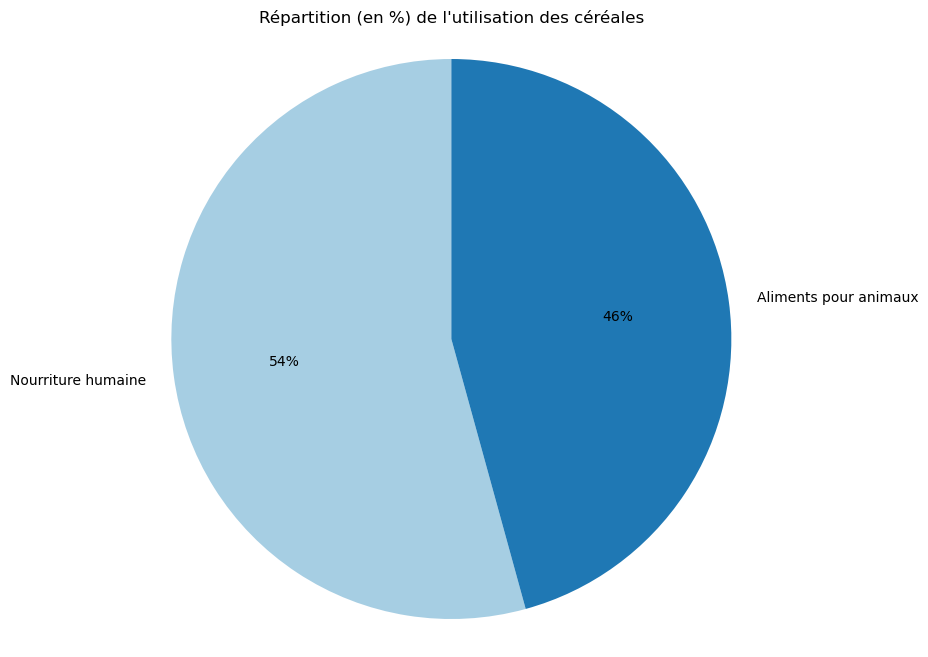

In [96]:
#Représenter avec un graphique en secteurs la répartion pour l'ensemble des céréales de la disponibilité des céréales entre nourriture animale et humaine
utilisationCereales = ['Nourriture humaine','Aliments pour animaux']
quantite_utilisationcereales = [sumAlimHuman,sumAlimAnim]
# Création du graphique circulaire
plt.figure(figsize=(10, 8))  # Taille du graphique
plt.pie(quantite_utilisationcereales, labels=utilisationCereales, autopct='%1.0f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Pour un cercle parfait
plt.title('Répartition (en %) de l\'utilisation des céréales')
plt.show()

In [97]:
#Répartition par types de céréales de son usage entre alimentation humaine ou animale
resultats = {}
liste_cereales=['Céréales, Autres','Blé','Seigle','Orge','Avoine','Maïs','Riz (Eq Blanchi)','Sorgho','Millet']

for cereale in liste_cereales:
    # Sélection des lignes correspondant à la céréale spécifique
    sous_dfcereales = cereales[cereales['Produit'] == cereale]
    
    # Calculer la somme de la nourriture humaine et de l'alimentation animale pour cette céréale
    somme_nourriture_humaine = sous_dfcereales['Nourriture'].sum()
    somme_alimentation_animale = sous_dfcereales['Aliments pour animaux'].sum()
    
    # Calculer la somme totale pour éviter les divisions par zéro
    somme_totale = somme_nourriture_humaine + somme_alimentation_animale
    if somme_totale > 0:  # Vérifier que la somme totale n'est pas nulle
        part_nourriture_humaine = round((somme_nourriture_humaine * 100) / somme_totale)
        part_alimentation_animale = round((somme_alimentation_animale * 100) / somme_totale)
    else:
        part_nourriture_humaine = 0
        part_alimentation_animale = 0

    # Stocker les résultats dans le dictionnaire
    resultats[cereale] = {
        'Part Nourriture humaine': part_nourriture_humaine,
        'Part Alimentation animale': part_alimentation_animale
    }

# Affichage des résultats
for cereale, resultat in resultats.items():
    print(f"Céréale: {cereale}")
    print(f"Part Nourriture humaine: {resultat.get('Part Nourriture humaine')}%")
    print(f"Part Alimentation animale: {resultat.get('Part Alimentation animale')}%")
    print()  # Ligne vide pour l'espacement

Céréale: Céréales, Autres
Part Nourriture humaine: 22%
Part Alimentation animale: 78%

Céréale: Blé
Part Nourriture humaine: 79%
Part Alimentation animale: 21%

Céréale: Seigle
Part Nourriture humaine: 40%
Part Alimentation animale: 60%

Céréale: Orge
Part Nourriture humaine: 7%
Part Alimentation animale: 93%

Céréale: Avoine
Part Nourriture humaine: 18%
Part Alimentation animale: 82%

Céréale: Maïs
Part Nourriture humaine: 19%
Part Alimentation animale: 81%

Céréale: Riz (Eq Blanchi)
Part Nourriture humaine: 92%
Part Alimentation animale: 8%

Céréale: Sorgho
Part Nourriture humaine: 49%
Part Alimentation animale: 51%

Céréale: Millet
Part Nourriture humaine: 88%
Part Alimentation animale: 12%



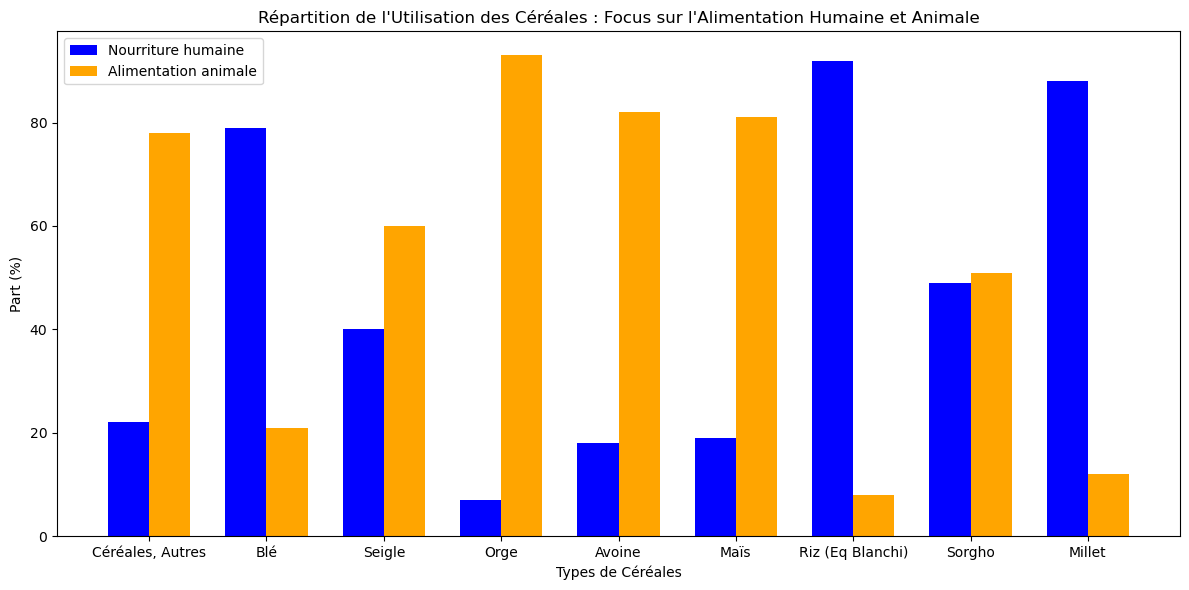

In [98]:
# Préparer les données pour le graphique
cereales_labels = list(resultats.keys())
parts_nourriture_humaine = [resultat['Part Nourriture humaine'] for resultat in resultats.values()]
parts_alimentation_animale = [resultat['Part Alimentation animale'] for resultat in resultats.values()]

# Définir la largeur des barres
bar_width = 0.35
x = np.arange(len(cereales_labels))  # Positions des barres

# Création du graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, parts_nourriture_humaine, width=bar_width, label='Nourriture humaine', color='blue')
plt.bar(x + bar_width/2, parts_alimentation_animale, width=bar_width, label='Alimentation animale', color='orange')

# Ajouter des labels et un titre
plt.xlabel('Types de Céréales')
plt.ylabel('Part (%)')
plt.title("Répartition de l'Utilisation des Céréales : Focus sur l'Alimentation Humaine et Animale")
plt.xticks(x, cereales_labels)  # Mettre les étiquettes sur l'axe des x
plt.legend()  # Afficher la légende
plt.tight_layout()  # Ajuster le layout
# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="m

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="m

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [102]:
#Créer la colonne proportion par pays
pop_sousnut['taux_sousnut'] = round(pop_sousnut['sous_nutrition'] *100/ pop_sousnut['Population'],2)

In [103]:
#Les 10 Pays les Plus Affectés par la Sous-Nutrition en 2017
pop_sousnut.sort_values('taux_sousnut', ascending = False, inplace=True)
pays_sousnut=pop_sousnut.head(10) 
pays_sousnut

,Zone,sous_nutrition,Année,Population,taux_sousnut
78,Haïti,5300000.0,2017,10982366.0,48.26
157,Corée du Nord,12000000.0,2017,25429825.0,47.19
108,Madagascar,10500000.0,2017,25570512.0,41.06
103,Libéria,1800000.0,2017,4702226.0,38.28
100,Lesotho,800000.0,2017,2091534.0,38.25
183,Tchad,5700000.0,2017,15016753.0,37.96
161,Rwanda,4200000.0,2017,11980961.0,35.06
121,Mozambique,9400000.0,2017,28649018.0,32.81
186,Timor-Leste,400000.0,2017,1243258.0,32.17
0,Afghanistan,10500000.0,2017,36296113.0,28.93


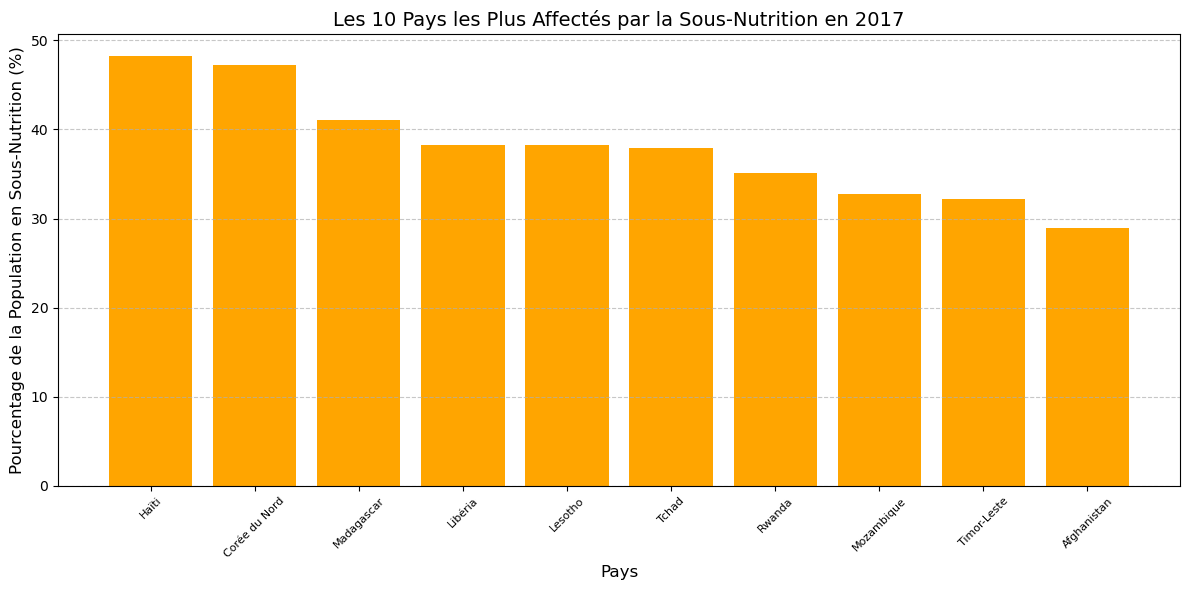

In [104]:
#Représentation graphique

# Création du graphique à barres
plt.figure(figsize=(12, 6))  # Définir la taille de la figure
plt.bar(pays_sousnut["Zone"], pays_sousnut["taux_sousnut"], color='orange')
plt.title("Les 10 Pays les Plus Affectés par la Sous-Nutrition en 2017", fontsize=14)
plt.xlabel("Pays", fontsize=12)
plt.ylabel("Pourcentage de la Population en Sous-Nutrition (%)", fontsize=12)
plt.xticks(fontsize=8, rotation=45)  # Taille de la police et rotation pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille horizontale pour faciliter la lecture
plt.tight_layout()  # Ajuster la mise en page
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [106]:
#calcul du total de l'aide alimentaire par pays
# Calculer le total de l'aide alimentaire par pays
# Groupement par 'Zone' et sommation des valeurs d'aide
total_aide_par_pays = aide.groupby('Zone')['Valeur'].sum().reset_index()

# Renommer la colonne pour plus de clarté
total_aide_par_pays.rename(columns={'Valeur': 'Total Aide Alimentaire'}, inplace=True)

# Afficher le résultat
print(total_aide_par_pays)

           Zone  Total Aide Alimentaire
0   Afghanistan               185452000
1       Algérie                81114000
2        Angola                 5014000
3    Bangladesh               348188000
4       Bhoutan                 2666000
..          ...                     ...
71       Zambie                 3026000
72     Zimbabwe                62570000
73       Égypte                 1122000
74     Équateur                 1362000
75     Éthiopie              1381294000

[76 rows x 2 columns]


In [107]:
# Trier les pays par total d'aide alimentaire, en ordre décroissant
total_aide_par_pays.sort_values('Total Aide Alimentaire', ascending=False, inplace=True)

# Obtenir les 10 pays ayant reçu le plus d'aide alimentaire
pays_max_aide = total_aide_par_pays.head(10)

# Afficher les résultats
print("Les 10 pays ayant bénéficié le plus de l'aide alimentaire :")
print(pays_max_aide)

Les 10 pays ayant bénéficié le plus de l'aide alimentaire :
                                Zone  Total Aide Alimentaire
50         République arabe syrienne              1858943000
75                          Éthiopie              1381294000
70                             Yémen              1206484000
61                     Soudan du Sud               695248000
60                            Soudan               669784000
30                             Kenya               552836000
3                         Bangladesh               348188000
59                           Somalie               292678000
53  République démocratique du Congo               288502000
43                             Niger               276344000


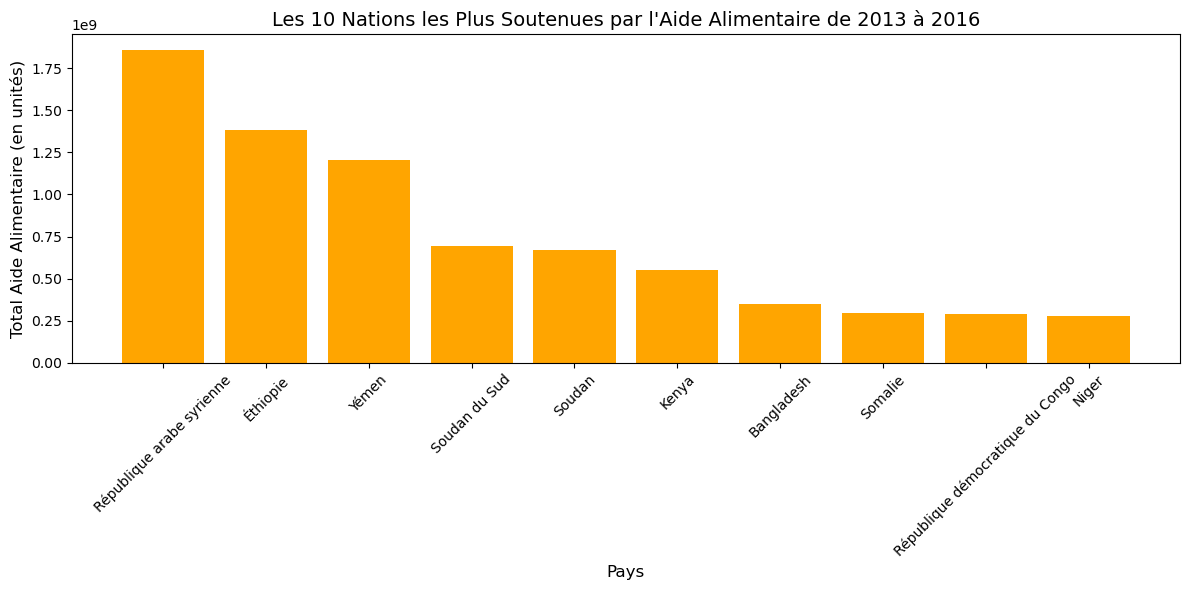

In [108]:
# Création du graphique à barres
plt.figure(figsize=(12, 6))  # Taille du graphique
plt.bar(pays_max_aide['Zone'], pays_max_aide['Total Aide Alimentaire'], color='orange')

# Ajouter des labels et un titre
plt.title("Les 10 Nations les Plus Soutenues par l'Aide Alimentaire de 2013 à 2016", fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Total Aide Alimentaire (en unités)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotation des étiquettes sur l'axe des x
# Afficher le graphique
plt.tight_layout()  # Ajuster le layout pour éviter le chevauchement de texte
plt.show()

In [109]:
#Analyse supplémentaire : Comparaison des pays les mieux nourris avec ceux qui reçoivent le plus d'aide alimentaire.

# Liste des DataFrames à comparer
dataframes_a_comparer = [pays_sousnut, pays_max_aide]

# Concatenation des DataFrames pour comparaison
comparaison_pays = pd.concat(dataframes_a_comparer, ignore_index=True)

# Afficher le DataFrame résultant
(comparaison_pays)

,Zone,sous_nutrition,Année,Population,taux_sousnut,Total Aide Alimentaire
0,Haïti,5300000.0,2017.0,10982366.0,48.26,NaN
1,Corée du Nord,12000000.0,2017.0,25429825.0,47.19,NaN
2,Madagascar,10500000.0,2017.0,25570512.0,41.06,NaN
3,Libéria,1800000.0,2017.0,4702226.0,38.28,NaN
4,Lesotho,800000.0,2017.0,2091534.0,38.25,NaN
5,Tchad,5700000.0,2017.0,15016753.0,37.96,NaN
6,Rwanda,4200000.0,2017.0,11980961.0,35.06,NaN
7,Mozambique,9400000.0,2017.0,28649018.0,32.81,NaN
8,Timor-Leste,400000.0,2017.0,1243258.0,32.17,NaN
9,Afghanistan,10500000.0,2017.0,36296113.0,28.93,NaN


##### Les pays qui bénéficient le plus d'aide alimentaire ne se retrouvent pas parmi les 10 pays ayant les taux de sous-nutrition les plus préoccupants.
##### Il faudrait le fichier des aides alimentaires de 2017 afin d'être réaliste.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [112]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
soutienAlim=aide[['Zone','Année','Valeur']]
soutienAlim.head()

,Zone,Année,Valeur
0,Afghanistan,2013,682000
1,Afghanistan,2014,335000
2,Afghanistan,2013,39224000
3,Afghanistan,2014,15160000
4,Afghanistan,2013,40504000


In [113]:
#Trie par zone et année
tri_soutienAlim=soutienAlim.groupby(['Zone','Année'])['Valeur'].sum()
tri_soutienAlim=tri_soutienAlim.reset_index()
tri_soutienAlim.head()

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [114]:
#Les 5 pays ayant le plus bénéficié de l'aide alimentaire
topCinq_Aide= pays_max_aide['Zone'].iloc[:5,]
topCinq_Aide.tolist()
topCinq_Aide

50    République arabe syrienne
75                     Éthiopie
70                        Yémen
61                Soudan du Sud
60                       Soudan
Name: Zone, dtype: object

In [115]:
#Filtrer le dataframe avec la liste des 5 pays
tri_aideCinq = tri_soutienAlim.loc[(tri_soutienAlim['Zone'].isin(topCinq_Aide)),:]
print(tri_aideCinq)

                          Zone  Année     Valeur
157  République arabe syrienne   2013  563566000
158  République arabe syrienne   2014  651870000
159  République arabe syrienne   2015  524949000
160  République arabe syrienne   2016  118558000
189                     Soudan   2013  330230000
190                     Soudan   2014  321904000
191                     Soudan   2015   17650000
192              Soudan du Sud   2013  196330000
193              Soudan du Sud   2014  450610000
194              Soudan du Sud   2015   48308000
214                      Yémen   2013  264764000
215                      Yémen   2014  103840000
216                      Yémen   2015  372306000
217                      Yémen   2016  465574000
225                   Éthiopie   2013  591404000
226                   Éthiopie   2014  586624000
227                   Éthiopie   2015  203266000


In [116]:
#Trier par année
tri_AideCinqbis=tri_aideCinq.sort_values(by='Année')
tri_AideCinqbis

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
189,Soudan,2013,330230000
192,Soudan du Sud,2013,196330000
214,Yémen,2013,264764000
225,Éthiopie,2013,591404000
215,Yémen,2014,103840000
190,Soudan,2014,321904000
158,République arabe syrienne,2014,651870000
226,Éthiopie,2014,586624000
193,Soudan du Sud,2014,450610000


In [117]:
#Réorganiser le dataframe avec les dates en colonnes
# Utiliser pivot pour transformer les années en colonnes
tri_aideCinq_pivot = tri_aideCinq.pivot(index='Zone', columns='Année', values='Valeur')

# Réinitialiser l'index pour un affichage propre
tri_aideCinq_pivot.reset_index(inplace=True)

# Afficher le DataFrame avec les années en colonnes
tri_aideCinq_pivot

Année,Zone,2013,2014,2015,2016
0,République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0
1,Soudan,330230000.0,321904000.0,17650000.0,NaN
2,Soudan du Sud,196330000.0,450610000.0,48308000.0,NaN
3,Yémen,264764000.0,103840000.0,372306000.0,465574000.0
4,Éthiopie,591404000.0,586624000.0,203266000.0,NaN


In [118]:
##Repivoter le df pour élaborer un graphique en ligne

# Utilisation de pivot pour transformer les années en colonnes
tri_aideCinq_pivot = tri_aideCinq.pivot(index='Zone', columns='Année', values='Valeur')

# Réinitialisation de l'index pour un affichage propre
tri_aideCinq_pivot.reset_index(inplace=True)

# Vérification des colonnes du DataFrame
print(tri_aideCinq_pivot.columns)  # Afficher les colonnes pour vérification

Index(['Zone', 2013, 2014, 2015, 2016], dtype='object', name='Année')


In [119]:
# Mettre 'Zone' comme index pour faciliter le traçage

if 'Zone' in tri_aideCinq_pivot.columns:
    tri_aideCinq_pivot.set_index('Zone', inplace=True)
else:
    print("Erreur : 'Zone' n'est pas dans les colonnes.")

In [120]:
# Transposer le DataFrame pour que les années soient en lignes
tri_aideCinq_pivot = tri_aideCinq_pivot.T

# Vérification du DataFrame après la transposition
print(tri_aideCinq_pivot)

Zone   République arabe syrienne       Soudan  Soudan du Sud        Yémen  \
Année                                                                       
2013                 563566000.0  330230000.0    196330000.0  264764000.0   
2014                 651870000.0  321904000.0    450610000.0  103840000.0   
2015                 524949000.0   17650000.0     48308000.0  372306000.0   
2016                 118558000.0          NaN            NaN  465574000.0   

Zone      Éthiopie  
Année               
2013   591404000.0  
2014   586624000.0  
2015   203266000.0  
2016           NaN  


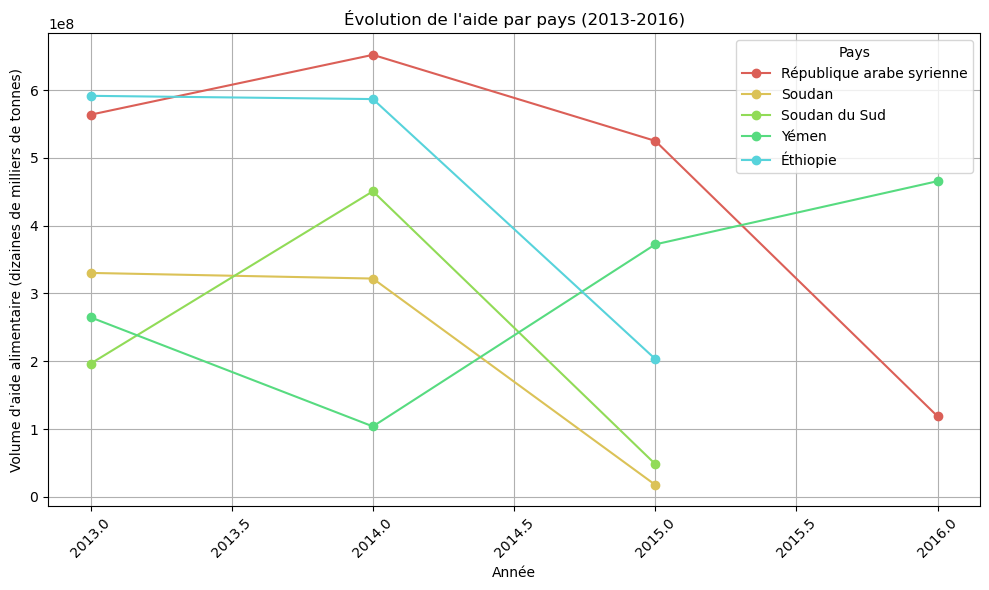

In [121]:
# Tracer le graphique
plt.figure(figsize=(10, 6))
for country in tri_aideCinq_pivot.columns:
    plt.plot(tri_aideCinq_pivot.index, tri_aideCinq_pivot[country], marker='o', label=country)

plt.title('Évolution de l\'aide par pays (2013-2016)')
plt.xlabel('Année')
plt.ylabel('Volume d\'aide alimentaire (dizaines de milliers de tonnes)')
plt.legend(title='Pays')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [123]:
# Disponibilité en kcal par personne par jour par pays
dispo_individu_jour = dispo.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_individu_jour

Zone
Afghanistan              2087.0
Afrique du Sud           3020.0
Albanie                  3188.0
Algérie                  3293.0
Allemagne                3503.0
                          ...  
Émirats arabes unis      3275.0
Équateur                 2346.0
États-Unis d'Amérique    3682.0
Éthiopie                 2129.0
Îles Salomon             2383.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 174, dtype: float64

In [124]:
# Trier par disponibilité alimentaire et obtenir les 10 pays avec le moins de disponibilité
pays_moins_dispo = dispo_individu_jour.sort_values(ascending=True).head(10)
print(pays_moins_dispo)

Zone
République centrafricaine    1879.0
Zambie                       1924.0
Madagascar                   2056.0
Afghanistan                  2087.0
Haïti                        2089.0
Corée du Nord                2093.0
Tchad                        2109.0
Zimbabwe                     2113.0
Ouganda                      2126.0
Timor-Leste                  2129.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64


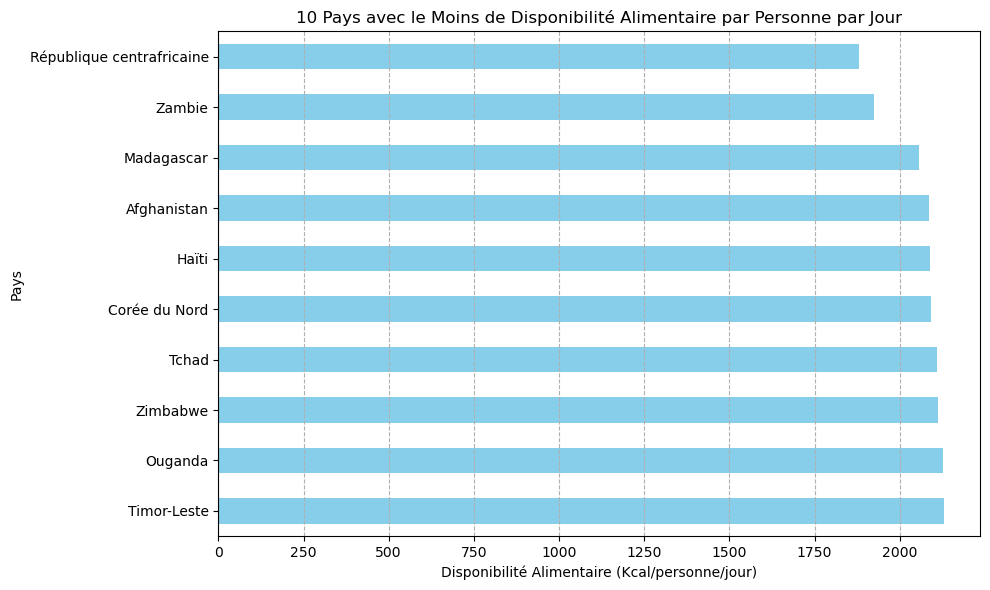

In [125]:
# Créer un diagramme en barres
plt.figure(figsize=(10, 6))
pays_moins_dispo.sort_values(ascending=False).plot(kind='barh', color='skyblue')  # Inversion ici pour avoir le minimum en haut
plt.title('10 Pays avec le Moins de Disponibilité Alimentaire par Personne par Jour')
plt.xlabel('Disponibilité Alimentaire (Kcal/personne/jour)')
plt.ylabel('Pays')
plt.grid(axis='x', linestyle='--')  # Ajoute une grille horizontale
plt.tight_layout()  # Ajuste la mise en page pour éviter le chevauchement
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [127]:
## Trier par disponibilité alimentaire et obtenir les 10 pays avec le plus de disponibilité
pays_plus_dispo=dispo_individu_jour.sort_values(ascending=False).head(10)
pays_plus_dispo

Zone
Autriche                 3770.0
Belgique                 3737.0
Turquie                  3708.0
États-Unis d'Amérique    3682.0
Israël                   3610.0
Irlande                  3602.0
Italie                   3578.0
Luxembourg               3540.0
Égypte                   3518.0
Allemagne                3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

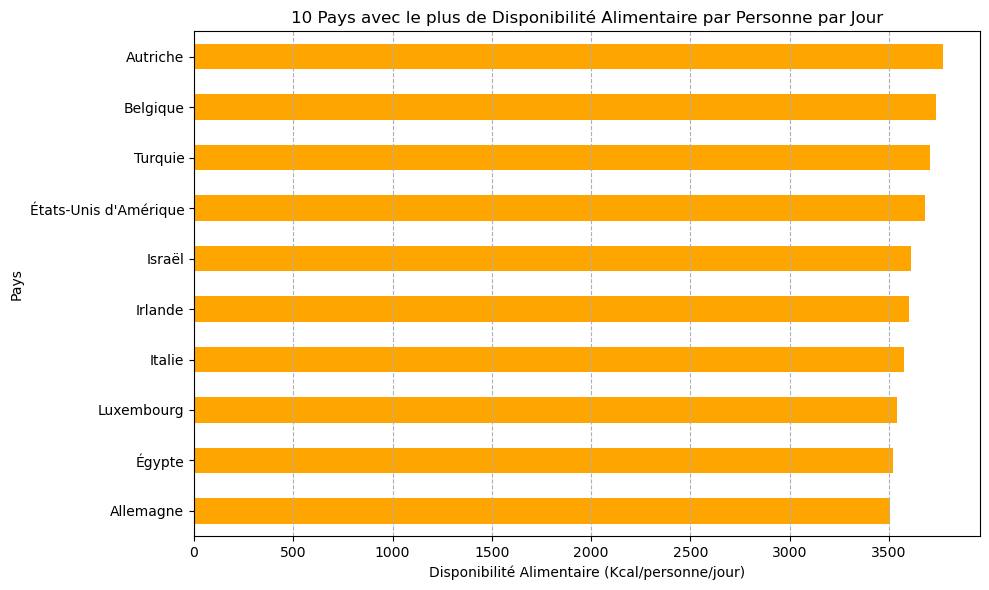

In [128]:
# Créer un diagramme en barres
plt.figure(figsize=(10, 6))
pays_plus_dispo.sort_values(ascending=True).plot(kind='barh', color='orange')  # Inversion ici pour avoir le minimum en haut
plt.title('10 Pays avec le plus de Disponibilité Alimentaire par Personne par Jour')
plt.xlabel('Disponibilité Alimentaire (Kcal/personne/jour)')
plt.ylabel('Pays')
plt.grid(axis='x', linestyle='--')  # Ajoute une grille horizontale
plt.tight_layout()  # Ajuste la mise en page pour éviter le chevauchement
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [130]:
#création d'un dataframe avec uniquement la Thaïlande 
thailande = dispo_pop.loc[(dispo_pop['Zone'] == 'Thaïlande'), :]
thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
13570,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0,69209810.0,207629430.0
13571,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0,69209810.0,0.0
13572,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,0.00,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0,69209810.0,0.0
13573,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0,69209810.0,138419620.0
13574,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0,69209810.0,692098100.0


In [131]:
#Calculer la sous-nutrition en Thaïlande
sousnut_thailande = pop_sousnut.loc[(pop_sousnut['Zone'] == 'Thaïlande'), ['Zone','sous_nutrition', 'taux_sousnut']]
sousnut_thailande
print('La sous-nutrition en Thailande concerne',sousnut_thailande.iloc[0,1],'personnes et représente', sousnut_thailande.iloc[0,2],'% de la population du pays.')

La sous-nutrition en Thailande concerne 6200000.0 personnes et représente 8.96 % de la population du pays.


In [132]:
# Calculer la quantité de Manioc produite par la Thaïlande 
thailande_manioc = thailande.loc[(thailande['Produit'] =='Manioc'), :]
production_manioc_thailande=thailande_manioc['Production'].sum()
print(f'La production de manioc en Thaïlande en 2017 est de {production_manioc_thailande} kg.')

La production de manioc en Thaïlande en 2017 est de 30228000000.0 kg.


In [133]:
#l'exportation du manioc en thailande
part_export_production_manioc_thailande = round((thailande_manioc['Exportations - Quantité'].sum()*100)/(thailande_manioc['Production'].sum()),2)
part_export_production_manioc_thailande
print(f'La somme des exportations de manioc de la Thaïlande représente {part_export_production_manioc_thailande} % de la production de manioc du du pays.')

La somme des exportations de manioc de la Thaïlande représente 83.41 % de la production de manioc du du pays.


In [134]:
#Regarder la répartition de la disponibilité alimentaire en manioc selon ses différents usages
variables = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture','Pertes','Semences','Traitement']
for variable in variables:
    repartition_dispoManioc=(round(thailande_manioc[variable].sum()*100/thailande_manioc['Disponibilité intérieure'].sum()))
    print(f"La part de la colonne {variable} représente {repartition_dispoManioc} % de la disponibilité intérieure de Manioc.")

La part de la colonne Aliments pour animaux représente 29 % de la disponibilité intérieure de Manioc.
La part de la colonne Autres Utilisations représente 33 % de la disponibilité intérieure de Manioc.
La part de la colonne Nourriture représente 14 % de la disponibilité intérieure de Manioc.
La part de la colonne Pertes représente 24 % de la disponibilité intérieure de Manioc.
La part de la colonne Semences représente 0 % de la disponibilité intérieure de Manioc.
La part de la colonne Traitement représente 0 % de la disponibilité intérieure de Manioc.


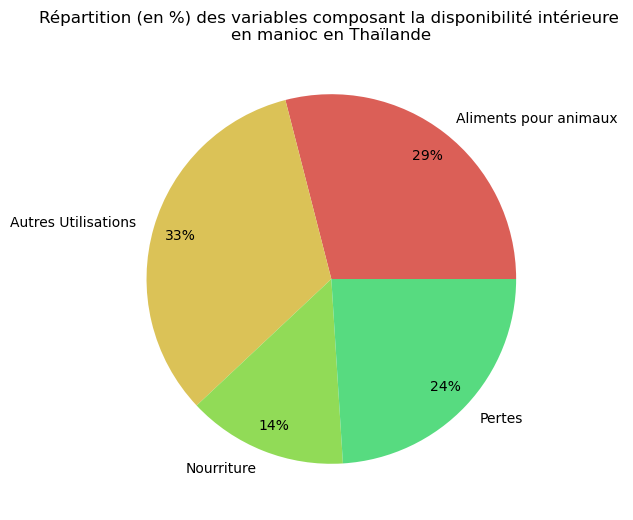

In [135]:
#Représenter la répartition des usages de la disponibilité intérieure de manioc en diagrammes à secteurs
#retirer les 2 utilisations à 0%
variables = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture','Pertes']
repartitions_dispoManioc = []
labels = []

for variable in variables:
    repartition_dispoManioc = (round(thailande_manioc[variable].sum()*100/thailande_manioc['Disponibilité intérieure'].sum()))
    repartitions_dispoManioc.append(repartition_dispoManioc)
    labels.append(f"{variable}")
    
plt.figure(figsize=(10, 6))    
plt.pie(repartitions_dispoManioc, labels=labels, autopct="%1.0f%%",pctdistance=0.85, labeldistance=1.1)
plt.title("Répartition (en %) des variables composant la disponibilité intérieure \nen manioc en Thaïlande")
plt.show()

In [136]:
#Regarder la disponibilité alimentaire par habitant
dispo_manioc_par_habitant_thailande= round(thailande_manioc['Disponibilité alimentaire en quantité (kg/personne/an)'].sum())
print(f'La disponibilité alimentaire de manioc en Thaïlande est de {dispo_manioc_par_habitant_thailande} kg/habitant/an.')

La disponibilité alimentaire de manioc en Thaïlande est de 13 kg/habitant/an.


In [137]:
##Regarder la part théorique des importations de manioc rapportées à la Production
part_import_production_thailande = round((thailande_manioc['Importations - Quantité'].sum()*100)/(thailande_manioc['Production'].sum()),2)
print(f"En 2017, la Thaïlande importe l'équivalent de {part_import_production_thailande} % de la quantité de manioc produite par le pays.")

En 2017, la Thaïlande importe l'équivalent de 4.14 % de la quantité de manioc produite par le pays.


In [138]:
#Somme de la production par catégorie de produit
thai_product=thailande.groupby('Produit')['Production'].sum().reset_index()
thai_product

,Produit,Production
0,Abats Comestible,4.500000e+07
1,"Agrumes, Autres",1.200000e+07
2,"Alcool, non Comestible",4.470000e+08
3,Aliments pour enfants,0.000000e+00
4,Ananas,2.209000e+09
...,...,...
90,Viande de Suides,8.910000e+08
91,Viande de Volailles,1.470000e+09
92,"Viande, Autre",0.000000e+00
93,Vin,0.000000e+00


In [139]:
#Somme de l'exportation par catégorie de produit
thai_product_export=thailande.groupby('Produit')['Exportations - Quantité'].sum().reset_index()
thai_product_export

,Produit,Exportations - Quantité
0,Abats Comestible,5.000000e+06
1,"Agrumes, Autres",6.000000e+06
2,"Alcool, non Comestible",1.100000e+08
3,Aliments pour enfants,7.000000e+06
4,Ananas,1.449000e+09
...,...,...
90,Viande de Suides,2.200000e+07
91,Viande de Volailles,5.360000e+08
92,"Viande, Autre",9.600000e+07
93,Vin,8.000000e+06


In [140]:
#Proportion des exportations VS productions par catégories
# Fusionner les deux DataFrames sur la colonne 'Produit'
propo_thai_product = pd.merge(thai_product, thai_product_export, on='Produit', suffixes=('_Production', '_Export'))

In [141]:
# Calculer la proportion des exportations par rapport à la production
propo_thai_product['Proportion Exportée'] = propo_thai_product['Exportations - Quantité'] / propo_thai_product['Production']
propo_thai_product

,Produit,Production,Exportations - Quantité,Proportion Exportée
0,Abats Comestible,4.500000e+07,5.000000e+06,0.111111
1,"Agrumes, Autres",1.200000e+07,6.000000e+06,0.500000
2,"Alcool, non Comestible",4.470000e+08,1.100000e+08,0.246085
3,Aliments pour enfants,0.000000e+00,7.000000e+06,inf
4,Ananas,2.209000e+09,1.449000e+09,0.655953
...,...,...,...,...
90,Viande de Suides,8.910000e+08,2.200000e+07,0.024691
91,Viande de Volailles,1.470000e+09,5.360000e+08,0.364626
92,"Viande, Autre",0.000000e+00,9.600000e+07,inf
93,Vin,0.000000e+00,8.000000e+06,inf


##### Je note que certains aliments ne sont pas produit mais malgré tout exporté, je décide d'aller vérifier avec mes imports car il arrive que certains pays soient uniquement des transitaires.

In [143]:
## Calculer la somme des importations par produit
thai_product_import = thailande.groupby('Produit')['Importations - Quantité'].sum().reset_index()

In [144]:
# Fusionner les données d'importation avec le DataFrame existant
thai_product = thailande.groupby('Produit').agg({
    'Production': 'sum',
    'Exportations - Quantité': 'sum',
    'Importations - Quantité': 'sum'
}).reset_index()

In [145]:
# Calculer la proportion exportée
thai_product['Proportion Exportée (%)'] = (thai_product['Exportations - Quantité'] / thai_product['Production']) * 100

In [146]:
# Afficher le résultat final
thai_product

,Produit,Production,Exportations - Quantité,Importations - Quantité,Proportion Exportée (%)
0,Abats Comestible,4.500000e+07,5.000000e+06,33000000.0,11.111111
1,"Agrumes, Autres",1.200000e+07,6.000000e+06,2000000.0,50.000000
2,"Alcool, non Comestible",4.470000e+08,1.100000e+08,21000000.0,24.608501
3,Aliments pour enfants,0.000000e+00,7.000000e+06,19000000.0,inf
4,Ananas,2.209000e+09,1.449000e+09,9000000.0,65.595292
...,...,...,...,...,...
90,Viande de Suides,8.910000e+08,2.200000e+07,1000000.0,2.469136
91,Viande de Volailles,1.470000e+09,5.360000e+08,11000000.0,36.462585
92,"Viande, Autre",0.000000e+00,9.600000e+07,4000000.0,inf
93,Vin,0.000000e+00,8.000000e+06,16000000.0,inf


In [147]:
# Filtrer pour afficher uniquement les lignes avec proportion exportée inf.
proportions_inf = thai_product[thai_product['Proportion Exportée (%)'] == float('inf')]
proportions_inf

,Produit,Production,Exportations - Quantité,Importations - Quantité,Proportion Exportée (%)
3,Aliments pour enfants,0.0,7000000.0,19000000.0,inf
9,"Beurre, Ghee",0.0,1000000.0,12000000.0,inf
53,Millet,0.0,1000000.0,5000000.0,inf
67,Plantes Aquatiques,0.0,1000000.0,4000000.0,inf
74,Pommes,0.0,43000000.0,156000000.0,inf
92,"Viande, Autre",0.0,96000000.0,4000000.0,inf
93,Vin,0.0,8000000.0,16000000.0,inf


## Pourquoi la Thaïlande exporte-t-elle des aliments  qu'elle ne produit pas ?

Plusieurs raisons peuvent expliquer ce phénomène :

- **Transformation et réexportation** : La Thaïlande importe parfois des ingrédients ou des produits semi-finis, les transforme localement (par exemple, conditionnement, ajout de vitamines, reconditionnement pour des marchés spécifiques), puis les exporte sous forme de produits finis. Ce modèle est courant dans l’industrie agroalimentaire mondiale, notamment dans les zones franches ou les hubs industriels[^1_2].
- **Production sous licence ou marque étrangère** : Il arrive que des entreprises étrangères fassent fabriquer leurs produits en Thaïlande sous licence, avec des matières premières importées, pour ensuite exporter ces produits vers d’autres marchés. Les statistiques de production locale peuvent alors ne pas refléter la réalité des flux de produits finis.
- **Statistiques douanières et classifications** : Les catégories « aliments pour enfants » regroupent parfois des produits très divers (laits infantiles, céréales, purées, snacks, etc.). Certains produits peuvent être classés différemment dans les statistiques de production par rapport aux statistiques d’exportation ou d’importation, ce qui crée des écarts apparents.

## Pourquoi les importations semblent-elles faibles ?

- **Importations d’ingrédients plutôt que de produits finis** : La Thaïlande importe surtout des ingrédients (lait en poudre, céréales, vitamines, etc.) plutôt que des produits finis. Ces ingrédients sont ensuite transformés localement.
- **Réexportation après transformation** : Une partie des importations d’ingrédients est destinée à la transformation et à la réexportation, ce qui peut expliquer le faible volume d’importations de produits finis pour enfants par rapport aux exportations de produits transformés.
- **Marché domestique limité pour certains produits** : Certains aliments pour enfants exportés ne correspondent pas aux habitudes alimentaires locales, et sont donc produits principalement pour l’exportation, avec peu ou pas de distribution sur le marché intérieur.
<div style="text-align: center">⁂</div>

[^1_1]: https://openknowledge.fao.org/server/api/core/bitstreams/92068abe-80de-4da0-a774-f13a158e84f0/content
[^1_2]: https://agriculture.gouv.fr/telecharger/81242?token=b16fde544d2527f9e0499ee4aab95f440badb2d2c79e8408806c54d1f0e3a84b



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaire</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.1 - Etude des ressources alimentaires en Haïti pour 2017</h3>
</div>

##### Pour cette analyse j'ai noté que le pays souffrant le plus de sous nutrition etait Haiti,pays situé dans les Caraïbes, occupant le tiers occidental de l’île d’Hispaniola, qu’elle partage avec la République dominicaine. 
##### Haïti est l’un des pays les plus pauvres du continent américain. Près de 60 % de la population vit avec moins de 2 US$/jour et l’indice de développement humain reste faible (0,552 en 2023, 158e sur 193 pays). L’économie repose principalement sur l’agriculture, les transferts de la diaspora et quelques industries textiles. La dépendance aux importations alimentaires, notamment du riz, est très forte.
##### source: https://www.diplomatie.gouv.fr/fr/dossiers-pays/haiti/presentation-de-haiti/
#####              https://www.banquemondiale.org/fr/country/haiti/overview

In [152]:
#Rappel de la population en haiti
pop_haiti_2017 = pop.loc[(pop['Zone'] == 'Haïti') & (pop['Année'] == 2017)]
pop_haiti_2017

,Zone,Année,Population
526,Haïti,2017,10982366.0


In [153]:
#Population en sous nutrition en haïti
pop_sousnut_Haiti_2017 = pop_sousnut.loc[pop_sousnut['Zone'] == 'Haïti']
pop_sousnut_Haiti_2017

,Zone,sous_nutrition,Année,Population,taux_sousnut
78,Haïti,5300000.0,2017,10982366.0,48.26


#### Le pourcentage de sous nutrition d'Haïti en 2017 est de 48.26 %

In [155]:
#Aliments nourrissant du plus disponible au moins disponible  / par jour et par personne en Kcal
Haiti_dispo=dispo[dispo['Zone']=='Haïti']
# Trier les données par 'Disponibilité alimentaire (Kcal/personne/jour)' de manière décroissante
class_Haiti_dispo = Haiti_dispo.sort_values(
    by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
print(class_Haiti_dispo[['Produit', 'Disponibilité alimentaire (Kcal/personne/jour)']])

               Produit  Disponibilité alimentaire (Kcal/personne/jour)
5983  Riz (Eq Blanchi)                                           426.0
5960              Maïs                                           217.0
5987     Sucre Eq Brut                                           159.0
5925               Blé                                           141.0
5970    Patates douces                                           118.0
...                ...                                             ...
5985              Soja                                             0.0
5991               Thé                                             0.0
5984            Seigle                                             0.0
5998               Vin                                             0.0
5999    Épices, Autres                                             0.0

[87 rows x 2 columns]


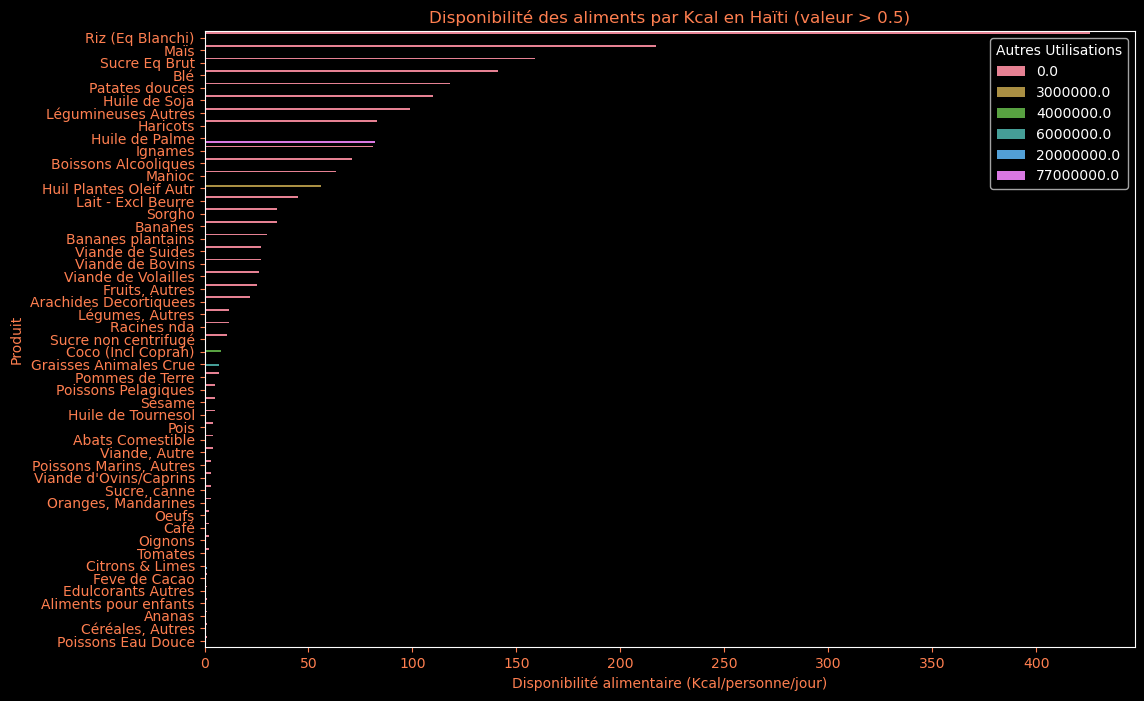

In [156]:
#visualisation
# Filtrer les aliments avec une disponibilité > 0.5
filtered_Haiti_dispo = Haiti_dispo[Haiti_dispo['Disponibilité alimentaire (Kcal/personne/jour)'] > 0.5]

# Trier les données par 'Disponibilité alimentaire (Kcal/personne/jour)' de manière décroissante
class_Haiti_dispo = filtered_Haiti_dispo.sort_values(
    by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)

# Définir le style du graphique avec un fond noir
plt.style.use('dark_background')

# Taille de la figure
plt.figure(figsize=(12, 8))

# Palette personnalisée avec des couleurs très vives
unique_categories = class_Haiti_dispo['Autres Utilisations'].nunique()
vivid_palette = sns.color_palette("husl", unique_categories)


# Créer un graphique à barres avec seaborn
sns.barplot(
    x='Disponibilité alimentaire (Kcal/personne/jour)', 
    y='Produit', 
    data=class_Haiti_dispo,
    hue='Autres Utilisations', 
    dodge=True,
    palette=vivid_palette
)


# Ajouter des labels et un titre en couleur corail
coral_color = '#FF7F50'
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)', color=coral_color)
plt.ylabel('Produit', color=coral_color)
plt.title('Disponibilité des aliments par Kcal en Haïti (valeur > 0.5)', color=coral_color)

# Changer la couleur des ticks et des axes
plt.tick_params(axis='x', colors=coral_color)
plt.tick_params(axis='y', colors=coral_color)

# Afficher le graphique
plt.show()

In [157]:
#Aliments du plus disponible au moins disponible 
Haiti_dispo=dispo[dispo['Zone']=='Haïti']
# Trier les données par 'Nourriture' de manière décroissante
class_Haiti_dispo_bis = Haiti_dispo.sort_values(
    by='Nourriture', ascending=False)
print(class_Haiti_dispo_bis[['Produit', 'Nourriture']])

                 Produit   Nourriture
5970      Patates douces  483000000.0
5983    Riz (Eq Blanchi)  441000000.0
5955             Ignames  340000000.0
5959              Manioc  288000000.0
5937      Fruits, Autres  255000000.0
...                  ...          ...
5972  Plantes Aquatiques          0.0
5991                 Thé          0.0
5984              Seigle          0.0
5985                Soja          0.0
5999      Épices, Autres          0.0

[87 rows x 2 columns]


In [158]:
class_Haiti_dispo_bis

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
5970,Haïti,Patates douces,vegetale,0.0,0.0,118.0,46.79,0.26,0.90,603000000.0,0.0,4000000.0,483000000.0,121000000.0,600000000.0,0.0,0.0,0.0
5983,Haïti,Riz (Eq Blanchi),vegetale,0.0,0.0,426.0,42.75,1.32,8.40,459000000.0,0.0,341000000.0,441000000.0,15000000.0,113000000.0,4000000.0,0.0,5000000.0
5955,Haïti,Ignames,vegetale,0.0,0.0,81.0,32.94,0.18,1.62,425000000.0,0.0,0.0,340000000.0,85000000.0,425000000.0,0.0,0.0,0.0
5959,Haïti,Manioc,vegetale,47000000.0,0.0,63.0,27.87,0.10,0.36,418000000.0,0.0,0.0,288000000.0,84000000.0,418000000.0,0.0,0.0,0.0
5937,Haïti,"Fruits, Autres",vegetale,0.0,0.0,25.0,24.74,0.68,0.24,315000000.0,11000000.0,6000000.0,255000000.0,60000000.0,321000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,Haïti,Plantes Aquatiques,animale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5991,Haïti,Thé,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5984,Haïti,Seigle,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5985,Haïti,Soja,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
#Aliments disponible pour les animaux
Haiti_dispo=dispo[dispo['Zone']=='Haïti']
class_Haiti_dispo_animal = Haiti_dispo.sort_values(
    by='Aliments pour animaux', ascending=False)
print(class_Haiti_dispo_animal[['Produit', 'Aliments pour animaux']])

                     Produit  Aliments pour animaux
5989            Sucre, canne            275000000.0
5922       Bananes plantains             77000000.0
5986                  Sorgho             60000000.0
5959                  Manioc             47000000.0
5960                    Maïs             20000000.0
...                      ...                    ...
5993  Viande d'Ovins/Caprins                    0.0
5995        Viande de Suides                    0.0
5996     Viande de Volailles                    0.0
5998                     Vin                    0.0
5999          Épices, Autres                    0.0

[87 rows x 2 columns]


In [160]:
#Comparaison
# Remplacer les valeurs NaN par 0
dispo['Aliments pour animaux'] = dispo['Aliments pour animaux'].fillna(0)
dispo['Nourriture'] = dispo['Nourriture'].fillna(0)

# Regrouper par Produit et sommaire les disponibilités
comparaison = dispo.groupby('Produit').agg({
    'Aliments pour animaux': 'sum',  # Somme des disponibilités alimentaires animales
    'Nourriture': 'sum'   # Somme des disponibilités alimentaires humaines
}).reset_index()
#Renommer les colonnes pour une meilleure lisibilité
comparaison.columns = ['Produit', 'Disponibilité Alimentaire (Animale)', 'Disponibilité Alimentaire (Humaine)']

# Filtrer pour enlever les lignes où les disponibilités sont nulles ou à zéro
comparaison_filtre = comparaison[(comparaison['Disponibilité Alimentaire (Humaine)'] > 0) | 
                            (comparaison['Disponibilité Alimentaire (Animale)'] > 0)]
print("Comparaison des disponibilités alimentaires par produit")
comparaison_filtre

Comparaison des disponibilités alimentaires par produit


,Produit,Disponibilité Alimentaire (Animale),Disponibilité Alimentaire (Humaine)
0,Abats Comestible,1.009000e+09,1.566900e+10
1,"Agrumes, Autres",0.000000e+00,1.135900e+10
3,Aliments pour enfants,0.000000e+00,7.610000e+08
4,Ananas,0.000000e+00,2.075700e+10
5,Animaux Aquatiques Autre,0.000000e+00,1.249000e+09
...,...,...,...
93,Viande de Suides,0.000000e+00,1.121000e+11
94,Viande de Volailles,0.000000e+00,1.048710e+11
95,"Viande, Autre",5.700000e+07,6.823000e+09
96,Vin,0.000000e+00,2.298500e+10


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18032\2600260396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparaison_filtre.loc[:, 'Total Disponibilité'] = comparaison_filtre['Disponibilité Alimentaire (Animale)'] + comparaison_filtre['Disponibilité Alimentaire (Humaine)']


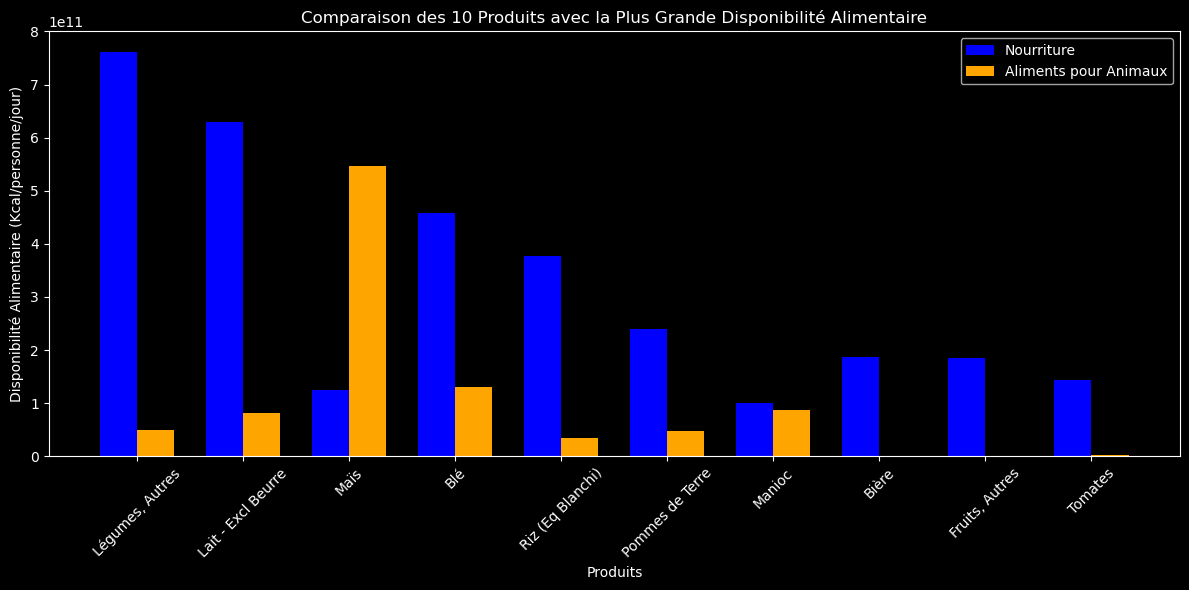

In [161]:
# Calculez la somme totale des disponibilités (animales et humaines) en utilisant .loc
comparaison_filtre.loc[:, 'Total Disponibilité'] = comparaison_filtre['Disponibilité Alimentaire (Animale)'] + comparaison_filtre['Disponibilité Alimentaire (Humaine)']
# Trier par la disponibilité totale et prendre les 10 premiers
top_10_comparaison = comparaison_filtre.sort_values(by='Total Disponibilité', ascending=False).head(10)

# Paramètres pour le graphique
bar_width = 0.35
index = range(len(top_10_comparaison))

# Création de la figure et des axes
plt.figure(figsize=(12, 6))

# Ajouter les barres pour la nourriture humaine
plt.bar(index, top_10_comparaison['Disponibilité Alimentaire (Humaine)'], bar_width, label='Nourriture', color='blue')

# Ajouter les barres pour les animaux, décalées
plt.bar([i + bar_width for i in index], top_10_comparaison['Disponibilité Alimentaire (Animale)'], bar_width, label='Aliments pour Animaux', color='orange')

# Ajouter des étiquettes et un titre
plt.xlabel('Produits')
plt.ylabel('Disponibilité Alimentaire (Kcal/personne/jour)')
plt.title('Comparaison des 10 Produits avec la Plus Grande Disponibilité Alimentaire')
plt.xticks([i + bar_width / 2 for i in index], top_10_comparaison['Produit'], rotation=45)
plt.legend()

# Afficher le graphique
plt.tight_layout()  # Ajuste les éléments pour éviter le chevauchement
plt.show()

In [162]:
top_10_comparaison

,Produit,Disponibilité Alimentaire (Animale),Disponibilité Alimentaire (Humaine),Total Disponibilité
49,"Légumes, Autres",4.936600e+10,7.621300e+11,8.114960e+11
48,Lait - Excl Beurre,8.197300e+10,6.297380e+11,7.117110e+11
52,Maïs,5.461160e+11,1.251840e+11,6.713000e+11
12,Blé,1.296680e+11,4.578240e+11,5.874920e+11
79,Riz (Eq Blanchi),3.359400e+10,3.772860e+11,4.108800e+11
76,Pommes de Terre,4.727300e+10,2.390770e+11,2.863500e+11
51,Manioc,8.705600e+10,1.006370e+11,1.876930e+11
11,Bière,0.000000e+00,1.870510e+11,1.870510e+11
25,"Fruits, Autres",6.100000e+07,1.854750e+11,1.855360e+11
89,Tomates,1.870000e+09,1.440800e+11,1.459500e+11


In [163]:
#Haïti a plus d'origine animale ou végétale?
Haiti_dispo = pd.DataFrame(Haiti_dispo)
origine_counts = Haiti_dispo['Origine'].value_counts()
print("Nombre d'origines végétales et animales pour Haïti :")
print(origine_counts)

Nombre d'origines végétales et animales pour Haïti :
Origine
vegetale    65
animale     22
Name: count, dtype: int64


In [164]:
#quel pourcentage de perte dans la production
haiti_dispo_filtre = Haiti_dispo.dropna(subset=['Pertes', 'Production'])
haiti_dispo_filtre = haiti_dispo_filtre[(haiti_dispo_filtre['Pertes'] >= 0) & 
                                             (haiti_dispo_filtre['Production'] > 0)]
# Calculer le pourcentage de perte par produit
haiti_dispo_filtre['Pourcentage de perte (%)'] = (haiti_dispo_filtre['Pertes'] / haiti_dispo_filtre['Production']) * 100
# Arrondir les pourcentages
haiti_dispo_filtre['Pourcentage de perte (%)'] = haiti_dispo_filtre['Pourcentage de perte (%)'].round(0)  # Arrondi à 0 décimale
print("Produits avec des pertes et une production non nulle :")
print(haiti_dispo_filtre[['Produit', 'Pertes', 'Production', 'Pourcentage de perte (%)']])

Produits avec des pertes et une production non nulle :
                       Produit       Pertes    Production  \
5913          Abats Comestible          0.0  1.100000e+07   
5917                    Ananas    1000000.0  7.000000e+06   
5919    Arachides Decortiquees    1000000.0  1.700000e+07   
5921                   Bananes   68000000.0  2.700000e+08   
5922         Bananes plantains   40000000.0  2.670000e+08   
5926      Boissons Alcooliques          0.0  9.000000e+07   
5928                      Café    1000000.0  1.800000e+07   
5930           Citrons & Limes    2000000.0  4.000000e+07   
5931        Coco (Incl Coprah)    1000000.0  2.800000e+07   
5932                 Crustacés          0.0  1.000000e+06   
5936             Feve de Cacao          0.0  1.000000e+07   
5937            Fruits, Autres   60000000.0  3.210000e+08   
5940          Graines de coton          0.0  1.000000e+06   
5941    Graisses Animales Crue          0.0  5.000000e+06   
5942                  Haricots

In [165]:
# Classer par Pourcentage de perte et sélectionner les 10 premiers
top_10_pertes = haiti_dispo_filtre.sort_values(by='Pourcentage de perte (%)', ascending=False).head(10)
print("Top 10 des produits avec le pourcentage de perte le plus élevé :")
print(top_10_pertes[['Produit', 'Pertes', 'Production', 'Pourcentage de perte (%)']])

Top 10 des produits avec le pourcentage de perte le plus élevé :
                Produit       Pertes   Production  Pourcentage de perte (%)
5921            Bananes   68000000.0  270000000.0                      25.0
5965            Oignons    2000000.0    8000000.0                      25.0
5959             Manioc   84000000.0  418000000.0                      20.0
5955            Ignames   85000000.0  425000000.0                      20.0
5970     Patates douces  121000000.0  600000000.0                      20.0
5981        Racines nda   12000000.0   60000000.0                      20.0
5937     Fruits, Autres   60000000.0  321000000.0                      19.0
5922  Bananes plantains   40000000.0  267000000.0                      15.0
5917             Ananas    1000000.0    7000000.0                      14.0
5983   Riz (Eq Blanchi)   15000000.0  113000000.0                      13.0


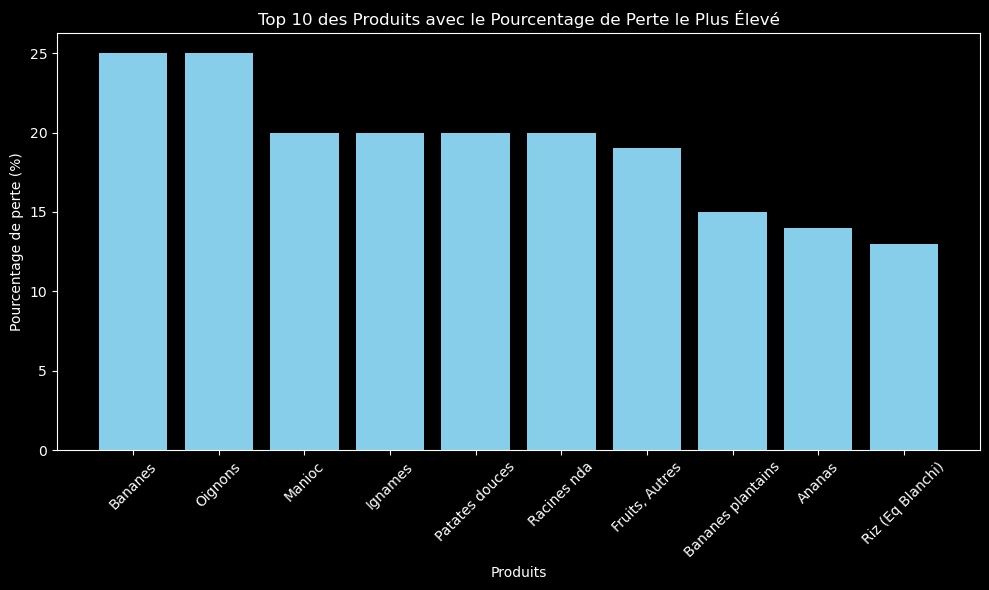

In [166]:
# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(top_10_pertes['Produit'], top_10_pertes['Pourcentage de perte (%)'], color='skyblue')

# Ajouter des étiquettes et un titre
plt.xlabel('Produits')
plt.ylabel('Pourcentage de perte (%)')
plt.title('Top 10 des Produits avec le Pourcentage de Perte le Plus Élevé')

# Rotation des étiquettes de l'axe x si nécessaire
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()  # Ajuste la mise en page
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.2 - Les surfaces agricoles </h3>
</div>

#### Afin de connaitre la possibilité de surface cultivable en Haïti, j'ai  récuperé les données concernant les surfaces agricoles sur le site de la FAO:
#### https://www.fao.org/faostat/en/#country/93 

In [169]:
# Chargement du fichier CSV en spécifiant le séparateur comme un point-virgule
surf_agricole = pd.read_csv('data_raw/surface_agricole_haiti.csv', sep=';', encoding='utf-8-sig')

# Affichage des 5 premières lignes pour vérifier le chargement
print(surf_agricole.head())

    Zone Element                 Type de surface   Année     Unit  Value  \
0  Haiti    Area                     Arable land  1961.0  1000 ha  900.0   
1  Haiti    Area                 Permanent crops  1961.0  1000 ha  260.0   
2  Haiti    Area  Permanent meadows and pastures  1961.0  1000 ha  500.0   
3  Haiti    Area                     Arable land  1962.0  1000 ha  900.0   
4  Haiti    Area                 Permanent crops  1962.0  1000 ha  265.0   

   Surface en hectare  surface en km2 Flag Description  Note  
0              900000            9000    Imputed value   NaN  
1              260000            2600    Imputed value   NaN  
2              500000            5000    Imputed value   NaN  
3              900000            9000    Imputed value   NaN  
4              265000            2650    Imputed value   NaN  


In [170]:
#Les informations du fichier
surf_agricole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zone                186 non-null    object 
 1   Element             186 non-null    object 
 2   Type de surface     186 non-null    object 
 3   Année               186 non-null    float64
 4   Unit                186 non-null    object 
 5   Value               186 non-null    float64
 6   Surface en hectare  187 non-null    int64  
 7   surface en km2      187 non-null    int64  
 8   Flag Description    186 non-null    object 
 9   Note                0 non-null      float64
dtypes: float64(3), int64(2), object(5)
memory usage: 14.7+ KB


In [171]:
#Consulter le nombre de valeurs présentes dans chacune des colonnes

print(surf_agricole['Zone'].value_counts())
print('Il y a', len(surf_agricole['Zone'].value_counts()), 'valeurs différentes dans la colonne', surf_agricole.columns[0],'.')

print(surf_agricole['Type de surface'].value_counts())
print('Il y a', len(surf_agricole['Type de surface'].value_counts()), 'types de surface dans la colonne', surf_agricole.columns[2],'.')

print(surf_agricole['Année'].value_counts())
print('Il y a', len(surf_agricole['Année'].value_counts()), 'années différentes dans la colonne', surf_agricole.columns[3],'.')

print(surf_agricole['surface en km2'].value_counts())
print('Il y a', len(surf_agricole['surface en km2'].value_counts()), 'surface en km2 différentes dans la colonne',surf_agricole.columns[7],'.')

Zone
Haiti    186
Name: count, dtype: int64
Il y a 1 valeurs différentes dans la colonne Zone .
Type de surface
Arable land                       62
Permanent crops                   62
Permanent meadows and pastures    62
Name: count, dtype: int64
Il y a 3 types de surface dans la colonne Type de surface .
Année
1961.0    3
1962.0    3
1963.0    3
1964.0    3
1965.0    3
         ..
2018.0    3
2019.0    3
2020.0    3
2021.0    3
2022.0    3
Name: count, Length: 62, dtype: int64
Il y a 62 années différentes dans la colonne Année .
surface en km2
4900      28
5000      27
9000      19
7800      16
3000      15
3200      12
11800      9
2800       9
3150       7
10000      6
3980       4
7680       4
8000       3
4950       3
7700       2
10050      2
2600       1
2700       1
2650       1
3100       1
2850       1
4980       1
4990       1
3160       1
2750       1
2900       1
2950       1
3050       1
4960       1
10260      1
4970       1
3390       1
3140       1
3540       1
3400 

In [172]:
#Affichage des 5 premieres lignes de la table 
display (surf_agricole.head())

,Zone,Element,Type de surface,Année,Unit,Value,Surface en hectare,surface en km2,Flag Description,Note
0,Haiti,Area,Arable land,1961.0,1000 ha,900.0,900000,9000,Imputed value,NaN
1,Haiti,Area,Permanent crops,1961.0,1000 ha,260.0,260000,2600,Imputed value,NaN
2,Haiti,Area,Permanent meadows and pastures,1961.0,1000 ha,500.0,500000,5000,Imputed value,NaN
3,Haiti,Area,Arable land,1962.0,1000 ha,900.0,900000,9000,Imputed value,NaN
4,Haiti,Area,Permanent crops,1962.0,1000 ha,265.0,265000,2650,Imputed value,NaN


#### Haïti possède une surface globale de 27 560 km^2 : https://www.diplomatie.gouv.fr/fr/dossiers-pays/haiti/presentation-de-haiti/

In [174]:
#Les trois types de surfaces agricoles en 2017

# Filtrer le DataFrame pour obtenir uniquement les lignes où l'année est 2017
surf_agricole_2017 = surf_agricole[surf_agricole['Année'] == 2017]
print (surf_agricole_2017)


      Zone Element                 Type de surface   Année     Unit   Value  \
168  Haiti    Area                     Arable land  2017.0  1000 ha  1180.0   
169  Haiti    Area                 Permanent crops  2017.0  1000 ha   340.0   
170  Haiti    Area  Permanent meadows and pastures  2017.0  1000 ha   490.0   

     Surface en hectare  surface en km2 Flag Description  Note  
168             1180000           11800    Imputed value   NaN  
169              340000            3400    Imputed value   NaN  
170              490000            4900    Imputed value   NaN  


In [175]:
#Regroupement par types de surface et sommes des valeurs
type_surface_2017 = surf_agricole_2017.groupby('Type de surface')['Value'].sum().reset_index()


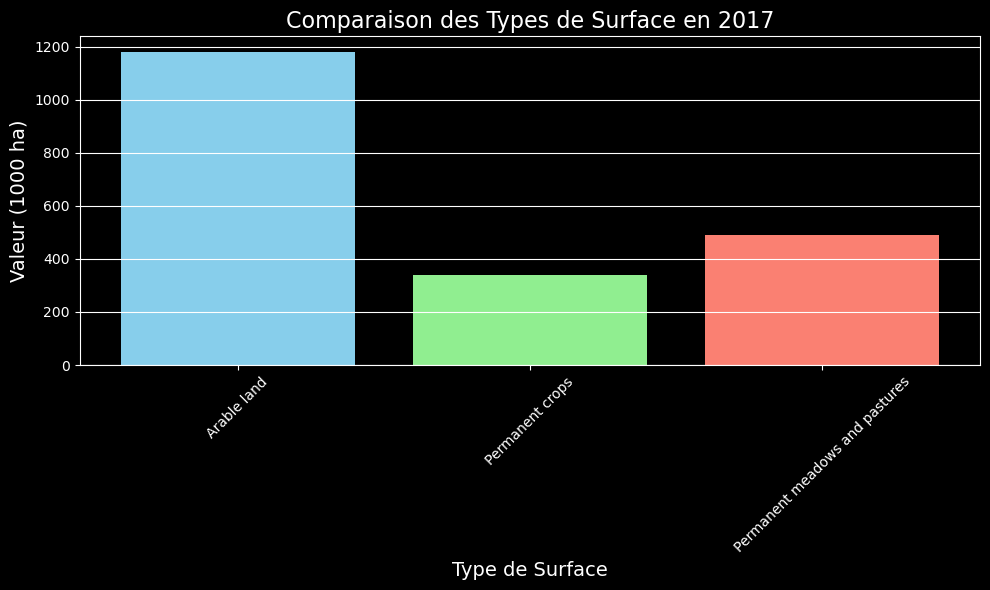

In [176]:
#Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(type_surface_2017['Type de surface'], type_surface_2017['Value'], color=['skyblue', 'lightgreen', 'salmon'])

# Ajout des titres et des labels
plt.title('Comparaison des Types de Surface en 2017', fontsize=16)
plt.xlabel('Type de Surface', fontsize=14)
plt.ylabel('Valeur (1000 ha)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Affichage du graphique
plt.tight_layout()
plt.show()

In [177]:
# Calculer la surface totale des terres arables en km² pour 2017
surface_arable_2017_km2 = surf_agricole_2017[surf_agricole_2017['Type de surface'] == 'Arable land']['surface en km2'].sum()

In [178]:
# Surface totale de Haïti en km²
surface_total_haiti_km2 = 27750 

In [179]:
# le ratio terres arables et surface globale en km2
ratio_arable_2017 = surface_arable_2017_km2 / surface_total_haiti_km2
print(f"Surface des terres arables en 2017 : {surface_arable_2017_km2} km²")
print(f"Surface totale de Haïti : {surface_total_haiti_km2} km²")
print(f"Ratio des terres arables par rapport à la surface totale de Haïti : {ratio_arable_2017:.4f}")

Surface des terres arables en 2017 : 11800 km²
Surface totale de Haïti : 27750 km²
Ratio des terres arables par rapport à la surface totale de Haïti : 0.4252


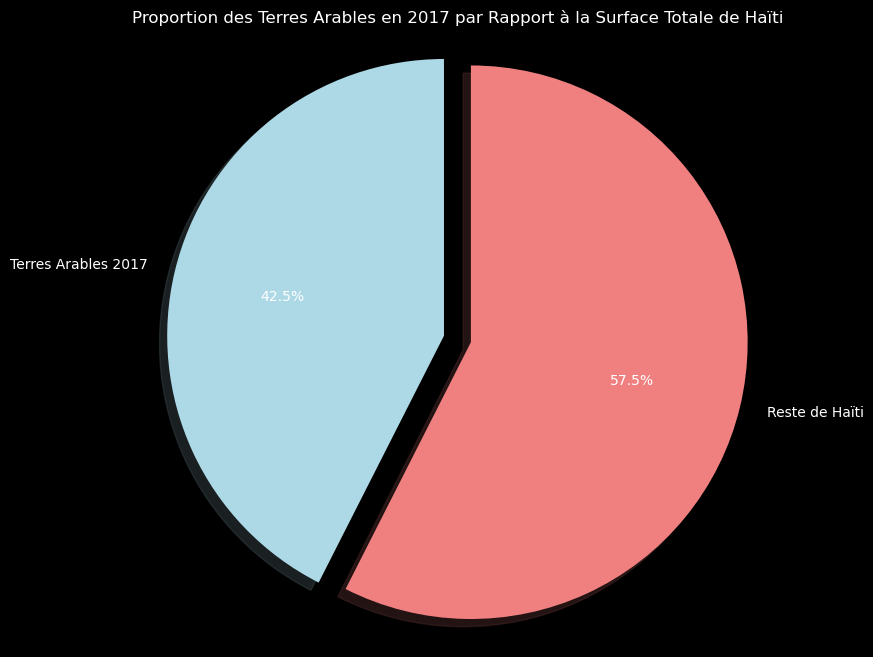

In [180]:
# Définir les données pour le camembert
labels = ['Terres Arables 2017', 'Reste de Haïti']
sizes = [surface_arable_2017_km2, surface_total_haiti_km2 - surface_arable_2017_km2]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Décale la première tranche

# Création du camembert
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Ajouter le titre
plt.title('Proportion des Terres Arables en 2017 par Rapport à la Surface Totale de Haïti')

# Assurer que le camembert est un cercle
plt.axis('equal')

# Afficher le graphique
plt.show()

In [181]:
#Calcul des autres types de surface agricole
surface_permanent_crops_km2 = surf_agricole_2017[surf_agricole_2017['Type de surface'] == 'Permanent crops']['surface en km2'].sum()
surface_permanent_meadows_km2 =surf_agricole_2017[surf_agricole_2017['Type de surface'] == 'Permanent meadows and pastures']['surface en km2'].sum()
print(f"Surface des cultures permanentes en 2017 : {surface_permanent_crops_km2} km²")
print(f"Surface des prairies permanentes en 2017 : {surface_permanent_meadows_km2} km²")

Surface des cultures permanentes en 2017 : 3400 km²
Surface des prairies permanentes en 2017 : 4900 km²


In [182]:
# Calculer la surface restante
surface_restante_km2 = surface_total_haiti_km2 - (surface_arable_2017_km2 + surface_permanent_crops_km2 + surface_permanent_meadows_km2)

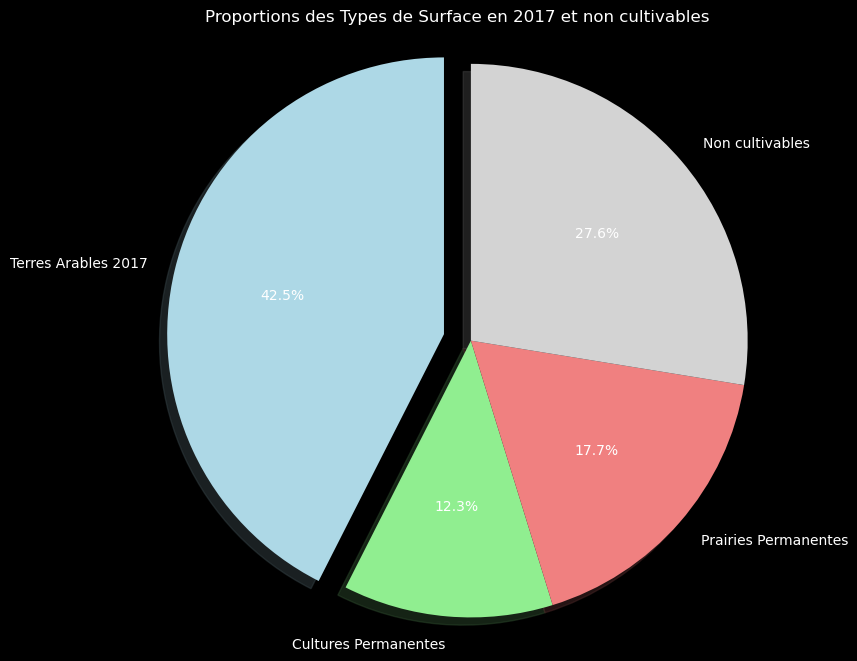

In [183]:
# Définir les données pour le camembert
labels = ['Terres Arables 2017', 'Cultures Permanentes', 'Prairies Permanentes', 'Non cultivables']
sizes = [surface_arable_2017_km2, surface_permanent_crops_km2, surface_permanent_meadows_km2, surface_restante_km2]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgray']
explode = (0.1, 0, 0, 0)  # Décale la première tranche

# Création du camembert
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Ajouter le titre
plt.title('Proportions des Types de Surface en 2017 et non cultivables')

# Assurer que le camembert est un cercle
plt.axis('equal')

# Afficher le graphique
plt.show()

### Nous constatons que nous avons une partie de terres arables importantes et tres peu de terres cultivées

In [185]:
# Filtrer le DataFrame pour obtenir uniquement les lignes où l'année est entre 2013 et 2017
resultats_2013_2017 = surf_agricole[(surf_agricole['Année'] >= 2013) & (surf_agricole['Année'] <= 2017)]
resultats_2013_2017

,Zone,Element,Type de surface,Année,Unit,Value,Surface en hectare,surface en km2,Flag Description,Note
156,Haiti,Area,Arable land,2013.0,1000 ha,1180.0,1180000,11800,Imputed value,NaN
157,Haiti,Area,Permanent crops,2013.0,1000 ha,398.0,398000,3980,Imputed value,NaN
158,Haiti,Area,Permanent meadows and pastures,2013.0,1000 ha,490.0,490000,4900,Imputed value,NaN
159,Haiti,Area,Arable land,2014.0,1000 ha,1180.0,1180000,11800,Imputed value,NaN
160,Haiti,Area,Permanent crops,2014.0,1000 ha,398.0,398000,3980,Imputed value,NaN
161,Haiti,Area,Permanent meadows and pastures,2014.0,1000 ha,490.0,490000,4900,Imputed value,NaN
162,Haiti,Area,Arable land,2015.0,1000 ha,1180.0,1180000,11800,Imputed value,NaN
163,Haiti,Area,Permanent crops,2015.0,1000 ha,398.0,398000,3980,Imputed value,NaN
164,Haiti,Area,Permanent meadows and pastures,2015.0,1000 ha,490.0,490000,4900,Imputed value,NaN
165,Haiti,Area,Arable land,2016.0,1000 ha,1180.0,1180000,11800,Imputed value,NaN


In [186]:
# Regrouper les données par année et type de surface et sommer les valeurs
evolution_surface = resultats_2013_2017.groupby(['Année', 'Type de surface'])['surface en km2'].sum().unstack()
print(evolution_surface)

Type de surface  Arable land  Permanent crops  Permanent meadows and pastures
Année                                                                        
2013.0                 11800             3980                            4900
2014.0                 11800             3980                            4900
2015.0                 11800             3980                            4900
2016.0                 11800             3980                            4900
2017.0                 11800             3400                            4900


<Figure size 1000x600 with 0 Axes>

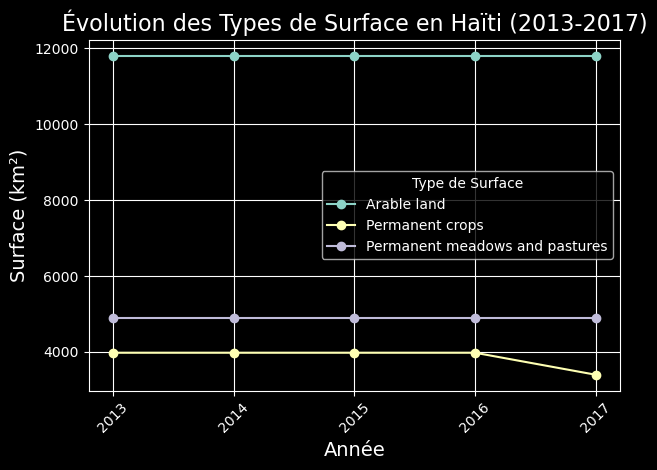

In [187]:
# Création du graphique
plt.figure(figsize=(10, 6))
evolution_surface.plot(kind='line', marker='o')

# Ajout des titres et des labels
plt.title('Évolution des Types de Surface en Haïti (2013-2017)', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Surface (km²)', fontsize=14)
plt.xticks(ticks=evolution_surface.index, rotation=45)
plt.grid(True)

# Afficher le graphique
plt.legend(title='Type de Surface')
plt.tight_layout()
plt.show()

### Ce graphique nous montre la non évolution de la culture de 2013 à 2017 et meme pire la baisse de cultures permanentes en 2017

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.3 -Accès à l'eau potable et assainissements </h3>
</div>

#### Afin d'analyser encore plus loin l'agriculture et la sous nutrition je vais explorer les données sur l'acces à l'eau potable et à l'assainissement de base en Haïti
##### Source :https://www.fao.org/faostat/en/#country/93

In [191]:
#Import du fichier
eau=pd.read_csv('data_raw/Acces_a_eau_potable.csv', sep=';', encoding='utf-8-sig')

In [192]:
#Informations sur le fichier
eau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zone              46 non-null     object 
 1   Catégorie         46 non-null     object 
 2   Année             46 non-null     int64  
 3   Unité             46 non-null     object 
 4   Valeur            46 non-null     int64  
 5   Flag Description  46 non-null     object 
 6   Note              0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.6+ KB


In [193]:
#Consulter le nombre de valeurs presentes pour chaque colonne
print(eau['Zone'].value_counts())
print('Il y a', len(eau['Zone'].value_counts()), 'Zone(s) différentes dans la colonne', eau.columns[0],'.')

print(eau['Catégorie'].value_counts())
print(eau['Catégorie'],len(eau['Catégorie'].value_counts()),'Catégorie(s) différentes dans la colonne', eau.columns[1],'.')

print(eau['Année'].value_counts())
print(eau['Année'], len(eau['Année'].value_counts()), 'année(s) différente(s) dans la colonne', eau.columns[2], '.')

print(eau['Valeur'].value_counts())
print(eau['Valeur'], len(eau['Valeur'].value_counts()), 'valeur(s) différente(s) dans la colonne', eau.columns[4], '.')

Zone
Haiti    46
Name: count, dtype: int64
Il y a 1 Zone(s) différentes dans la colonne Zone .
Catégorie
Acces à l'eau potable de base                23
Acces au service d'assainissement de base    23
Name: count, dtype: int64
0                 Acces à l'eau potable de base
1     Acces au service d'assainissement de base
2                 Acces à l'eau potable de base
3     Acces au service d'assainissement de base
4                 Acces à l'eau potable de base
5     Acces au service d'assainissement de base
6                 Acces à l'eau potable de base
7     Acces au service d'assainissement de base
8                 Acces à l'eau potable de base
9     Acces au service d'assainissement de base
10                Acces à l'eau potable de base
11    Acces au service d'assainissement de base
12                Acces à l'eau potable de base
13    Acces au service d'assainissement de base
14                Acces à l'eau potable de base
15    Acces au service d'assainissement de base
16   

In [194]:
#Affichage des 5 premieres lignes du dataframe
display(eau.head())

,Zone,Catégorie,Année,Unité,Valeur,Flag Description,Note
0,Haiti,Acces à l'eau potable de base,2000,%,56,Figure from international organizations,NaN
1,Haiti,Acces au service d'assainissement de base,2000,%,17,Figure from international organizations,NaN
2,Haiti,Acces à l'eau potable de base,2001,%,57,Figure from international organizations,NaN
3,Haiti,Acces au service d'assainissement de base,2001,%,18,Figure from international organizations,NaN
4,Haiti,Acces à l'eau potable de base,2002,%,58,Figure from international organizations,NaN


In [195]:
#Acces à l'eau en 2017- Regroupement et sommes des valeurs
eau_2017 = eau[eau['Année']==2017]
print (eau_2017)
for index, row in eau_2017.iterrows():
    print(f'En {row["Année"]}, {row["Valeur"]}% de la population d\'Haïti avait {row["Catégorie"].lower()}.')

     Zone                                  Catégorie  Année Unité  Valeur  \
34  Haiti              Acces à l'eau potable de base   2017     %      66   
35  Haiti  Acces au service d'assainissement de base   2017     %      35   

                           Flag Description  Note  
34  Figure from international organizations   NaN  
35  Figure from international organizations   NaN  
En 2017, 66% de la population d'Haïti avait acces à l'eau potable de base.
En 2017, 35% de la population d'Haïti avait acces au service d'assainissement de base.


In [196]:
#Graphique d'évolution des acces à l'eau potable et au sanitaires
# Filtrer le DataFrame pour obtenir uniquement les lignes entre 2013 et 2017
eau_2013_2017 = eau[(eau['Année'] >= 2013) & (eau['Année'] <= 2017)]

# Regrouper les données par année et catégorie, puis sommer les valeurs
evolution = eau_2013_2017.groupby(['Année', 'Catégorie'])['Valeur'].mean().unstack()
print(evolution)

Catégorie  Acces au service d'assainissement de base  \
Année                                                  
2013                                            30.0   
2014                                            31.0   
2015                                            32.0   
2016                                            34.0   
2017                                            35.0   

Catégorie  Acces à l'eau potable de base  
Année                                     
2013                                64.0  
2014                                64.0  
2015                                65.0  
2016                                65.0  
2017                                66.0  


<Figure size 1000x600 with 0 Axes>

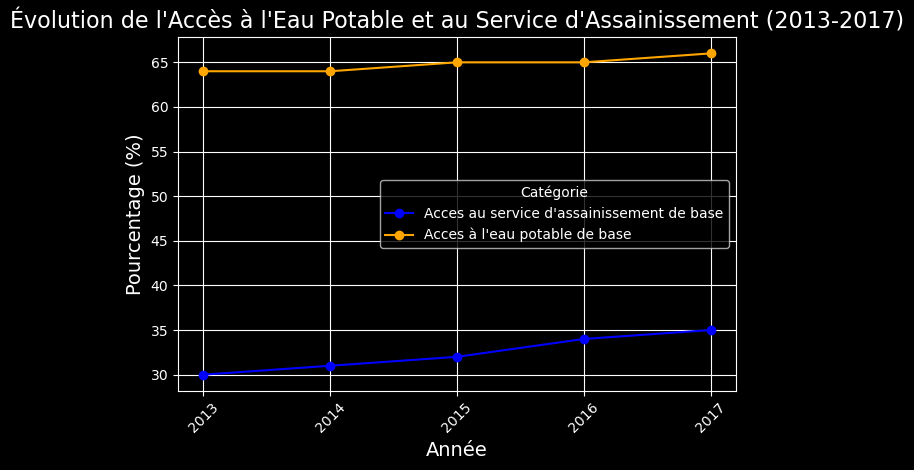

In [197]:
# Création du graphique
plt.figure(figsize=(10, 6))

# Spécifiez les couleurs ici
couleurs = ['blue', 'orange']  # Changer les couleurs selon votre préférence

evolution.plot(kind='line', marker='o', color=couleurs)

# Ajout des titres et des labels
plt.title('Évolution de l\'Accès à l\'Eau Potable et au Service d\'Assainissement (2013-2017)', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Pourcentage (%)', fontsize=14)
plt.xticks(ticks=evolution.index, rotation=45)
plt.grid(True)

# Afficher le graphique
plt.legend(title='Catégorie')
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.4 -L'alimentation infantile(- de 5 ans) </h3>
</div>

#### Afin d'analyser les conséquences de la sous nutrition infantile en Haïti, j'ai récuperé les fichiers sur le site de la FAO source: https://www.fao.org/faostat/en/#country/93

In [200]:
#Import du fichier
alim_infantile=pd.read_csv('data_raw/Malnutrion infantile Haiti.csv', sep=';', encoding='utf-8-sig')

In [201]:
alim_infantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              69 non-null     object 
 1   Affection         69 non-null     object 
 2   Année             69 non-null     int64  
 3   Unit              69 non-null     object 
 4   Value             50 non-null     float64
 5   Flag Description  69 non-null     object 
 6   Note              0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.9+ KB


In [202]:
display(alim_infantile.head())

,Area,Affection,Année,Unit,Value,Flag Description,Note
0,Haiti,Retard de croissance,2000,%,30.3,Figure from international organizations,NaN
1,Haiti,Emaciation,2000,%,5.5,Figure from international organizations,NaN
2,Haiti,Surpoid,2000,%,3.7,Figure from international organizations,NaN
3,Haiti,Retard de croissance,2001,%,29.8,Figure from international organizations,NaN
4,Haiti,Emaciation,2001,%,NaN,Figure from international organizations,NaN


In [203]:
# Remplacer les NaN par 0
alim_infantile = alim_infantile.fillna(0)
print (alim_infantile)

     Area             Affection  Année Unit  Value  \
0   Haiti  Retard de croissance   2000    %   30.3   
1   Haiti            Emaciation   2000    %    5.5   
2   Haiti               Surpoid   2000    %    3.7   
3   Haiti  Retard de croissance   2001    %   29.8   
4   Haiti            Emaciation   2001    %    0.0   
..    ...                   ...    ...  ...    ...   
64  Haiti            Emaciation   2021    %    0.0   
65  Haiti               Surpoid   2021    %    3.7   
66  Haiti  Retard de croissance   2022    %   19.5   
67  Haiti            Emaciation   2022    %    0.0   
68  Haiti               Surpoid   2022    %    3.7   

                           Flag Description  Note  
0   Figure from international organizations   0.0  
1   Figure from international organizations   0.0  
2   Figure from international organizations   0.0  
3   Figure from international organizations   0.0  
4   Figure from international organizations   0.0  
..                                     

In [204]:
#Filtre 2017
alim_infant_2017=alim_infantile[alim_infantile["Année"]==2017]
print (alim_infant_2017)

     Area             Affection  Année Unit  Value  \
51  Haiti  Retard de croissance   2017    %   21.4   
52  Haiti            Emaciation   2017    %    3.7   
53  Haiti               Surpoid   2017    %    3.5   

                           Flag Description  Note  
51  Figure from international organizations   0.0  
52  Figure from international organizations   0.0  
53  Figure from international organizations   0.0  


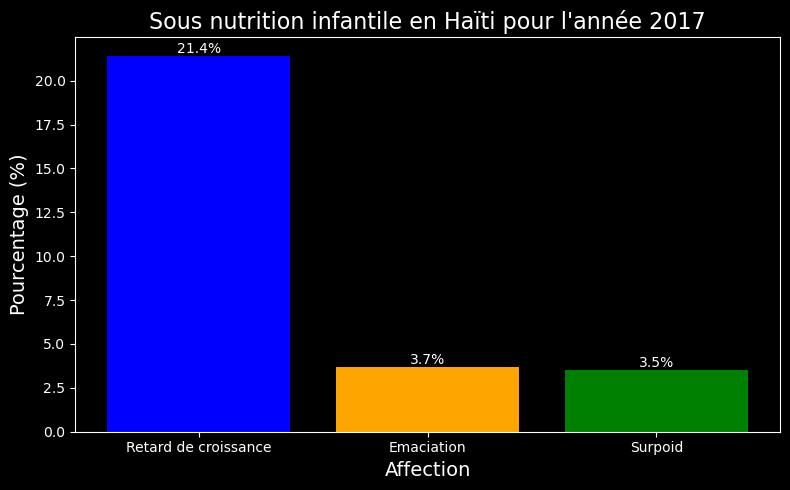

In [205]:
#Affections 2017 graphique
# Création du graphique à barres
plt.figure(figsize=(8, 5))
plt.bar(alim_infant_2017['Affection'], alim_infant_2017['Value'], color=['blue', 'orange', 'green'])

# Ajouter des titres et des labels
plt.title('Sous nutrition infantile en Haïti pour l\'année 2017', fontsize=16)
plt.xlabel('Affection', fontsize=14)
plt.ylabel('Pourcentage (%)', fontsize=14)

# Optionnel : afficher les valeurs au-dessus des barres
for index, value in enumerate(alim_infant_2017['Value']):
    plt.text(index, value, f"{value:.1f}%", ha='center', va='bottom')

# Afficher le graphique
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

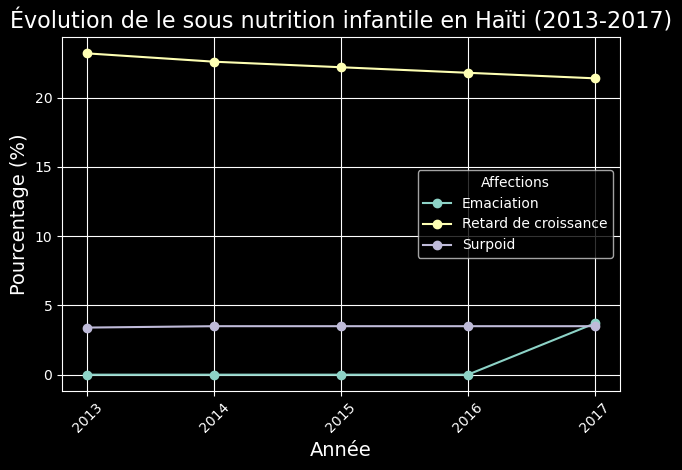

In [206]:
# Filtrer le DataFrame pour obtenir uniquement les lignes entre 2013 et 2017
alim_infant_2013_2017 = alim_infantile[(alim_infantile['Année'] >= 2013) & (alim_infantile['Année'] <= 2017)]

# Regrouper les données par année et affection, puis sommer les valeurs
evolution = alim_infant_2013_2017.groupby(['Année', 'Affection'])['Value'].mean().unstack()

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer le graphique
evolution.plot(kind='line', marker='o')

# Ajout des titres et des labels
plt.title('Évolution de le sous nutrition infantile en Haïti (2013-2017)', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Pourcentage (%)', fontsize=14)
plt.xticks(ticks=evolution.index, rotation=45)
plt.grid(True)

# Afficher le graphique
plt.legend(title='Affections')
plt.tight_layout()
plt.show()

In [207]:
#Vérification d'analyse
print (alim_infant_2013_2017)

     Area             Affection  Année Unit  Value  \
39  Haiti  Retard de croissance   2013    %   23.2   
40  Haiti            Emaciation   2013    %    0.0   
41  Haiti               Surpoid   2013    %    3.4   
42  Haiti  Retard de croissance   2014    %   22.6   
43  Haiti            Emaciation   2014    %    0.0   
44  Haiti               Surpoid   2014    %    3.5   
45  Haiti  Retard de croissance   2015    %   22.2   
46  Haiti            Emaciation   2015    %    0.0   
47  Haiti               Surpoid   2015    %    3.5   
48  Haiti  Retard de croissance   2016    %   21.8   
49  Haiti            Emaciation   2016    %    0.0   
50  Haiti               Surpoid   2016    %    3.5   
51  Haiti  Retard de croissance   2017    %   21.4   
52  Haiti            Emaciation   2017    %    3.7   
53  Haiti               Surpoid   2017    %    3.5   

                           Flag Description  Note  
39  Figure from international organizations   0.0  
40  Figure from international o

##### Nous ne pouvons pas prendre en compte la courbe d'emaciation car avant 2017 nous n'avions aucune valeur, soit les valeurs étaient à zero par réalité et dans ce cas nous avons une réelle hausse soit la collecte des informations n'est pas disponible

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.5 -La mortalité infantile en Haïti de 2013 à 2017 </h3>
</div>

### Afin de mener cette analyse j'ai récupéré le fichier csv sur la banque mondiale (WBG) source: https://donnees.banquemondiale.org/indicateur/SH.DYN.MORT

In [211]:
#Import du fichier
mort_infant=pd.read_csv('data_raw/Mortalité infantile avant 5 ans.csv', sep=';', encoding='utf-8-sig')

In [212]:
#Afficher les informations du fichier
mort_infant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FREQ_NAME          12994 non-null  object 
 1   REF_AREA_ID        12994 non-null  object 
 2   REF_AREA_NAME      12994 non-null  object 
 3   INDICATOR_NAME     12994 non-null  object 
 4   UNIT_MEASURE_NAME  12994 non-null  object 
 5   TIME_PERIOD        12994 non-null  int64  
 6   OBS_VALUE          12994 non-null  float64
 7   TIME_FORMAT_NAME   12994 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 812.3+ KB


In [213]:
#Filtre pour Haiti de 2013 à 2017
filtre_haiti = mort_infant[(mort_infant['REF_AREA_NAME'] == 'Haiti') & (mort_infant['TIME_PERIOD'].isin([2013, 2014, 2015, 2016, 2017]))]
print (filtre_haiti)

      FREQ_NAME REF_AREA_ID REF_AREA_NAME                  INDICATOR_NAME  \
10675    Annual         HTI         Haiti  Mortalité infantile - de 5 ans   
10919    Annual         HTI         Haiti  Mortalité infantile - de 5 ans   
11163    Annual         HTI         Haiti  Mortalité infantile - de 5 ans   
11407    Annual         HTI         Haiti  Mortalité infantile - de 5 ans   
11651    Annual         HTI         Haiti  Mortalité infantile - de 5 ans   

               UNIT_MEASURE_NAME  TIME_PERIOD  OBS_VALUE TIME_FORMAT_NAME  
10675  mort pour 1000 naissances         2013       73.5           Annual  
10919  mort pour 1000 naissances         2014       71.7           Annual  
11163  mort pour 1000 naissances         2015       69.7           Annual  
11407  mort pour 1000 naissances         2016       67.8           Annual  
11651  mort pour 1000 naissances         2017       65.9           Annual  


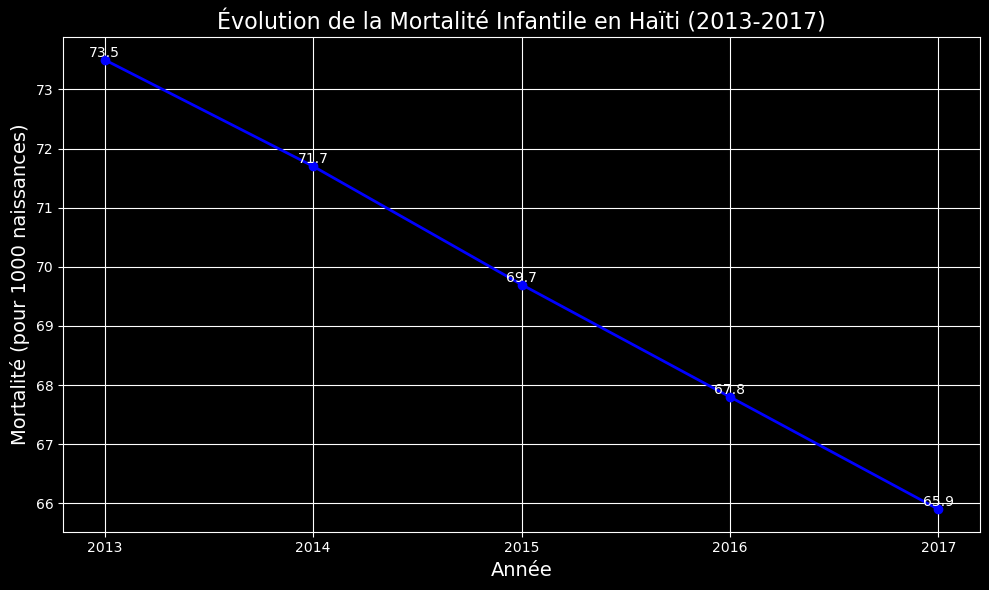

In [214]:
# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer la courbe
plt.plot(filtre_haiti['TIME_PERIOD'], filtre_haiti['OBS_VALUE'], marker='o', color='blue', linestyle='-', linewidth=2)

# Ajout des titres et des labels
plt.title('Évolution de la Mortalité Infantile en Haïti (2013-2017)', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Mortalité (pour 1000 naissances)', fontsize=14)

# Affichage des valeurs sur la courbe
for i in range(len(filtre_haiti)):
    plt.text(filtre_haiti['TIME_PERIOD'].iloc[i], filtre_haiti['OBS_VALUE'].iloc[i], f"{filtre_haiti['OBS_VALUE'].iloc[i]:.1f}", ha='center', va='bottom')

# Configuration de la grille et des ticks
plt.grid(True)
plt.xticks(filtre_haiti['TIME_PERIOD'])

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.6 -Evolution de la sous nutrition en Haïti de 2013 à 2019 </h3>
</div>

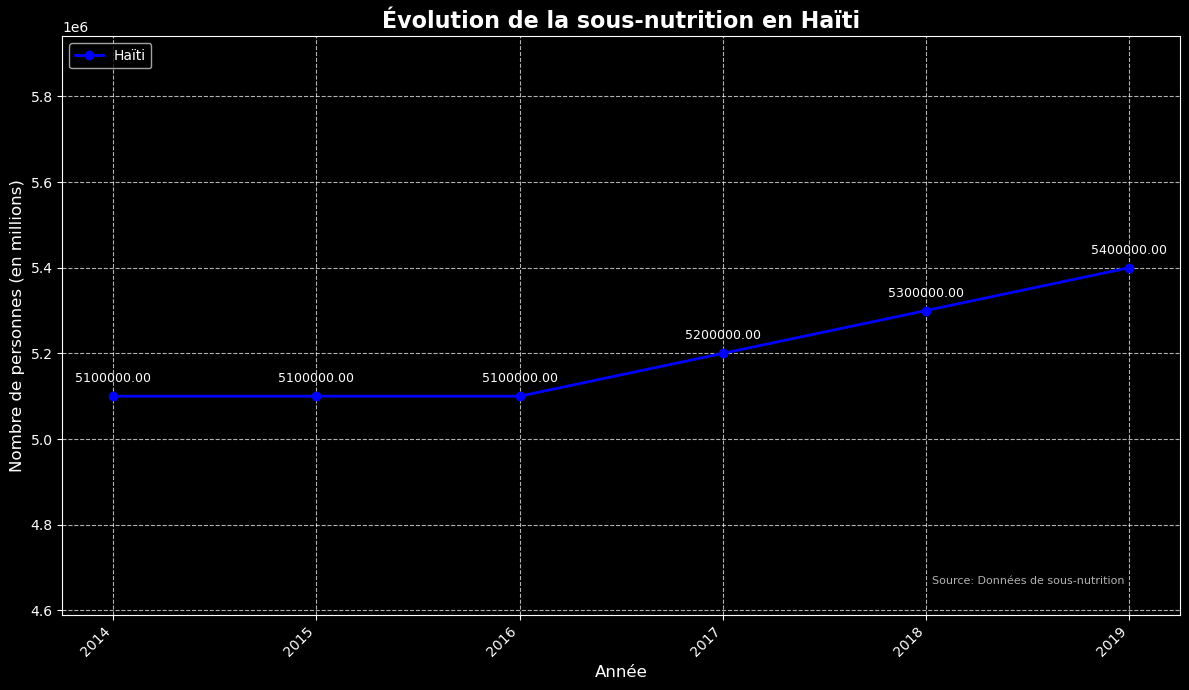

In [216]:
# Evolution de la sous nutrition en Haiti 
haiti_sousnut = sousnut[sousnut['Zone'] == 'Haïti'].copy()  # Créer une copie explicite

# Extraire l'année de fin de chaque intervalle
haiti_sousnut['Année_fin'] = haiti_sousnut['Année'].str.split('-').str[1].astype(int)

# Créer le graphique
plt.figure(figsize=(12, 7))
plt.plot(haiti_sousnut['Année_fin'], haiti_sousnut['sous_nutrition'], marker='o', linestyle='-', color='b', linewidth=2)

plt.title("Évolution de la sous-nutrition en Haïti", fontsize=16, fontweight='bold')
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de personnes (en millions)", fontsize=12)

# Ajouter des étiquettes de données
for i, txt in enumerate(haiti_sousnut['sous_nutrition']):
    plt.annotate(f"{txt:.2f}", (haiti_sousnut['Année_fin'].iloc[i], txt), 
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Personnaliser la grille
plt.grid(True, linestyle='--', alpha=0.7)

# Personnaliser les ticks de l'axe x
plt.xticks(haiti_sousnut['Année_fin'], rotation=45, ha='right')

# Ajouter une légende
plt.legend(['Haïti'], loc='upper left')

# Ajuster les limites de l'axe y
y_min = haiti_sousnut['sous_nutrition'].min() * 0.9
y_max = haiti_sousnut['sous_nutrition'].max() * 1.1
plt.ylim(y_min, y_max)

# Ajouter un texte explicatif
plt.text(0.95, 0.05, 'Source: Données de sous-nutrition', 
         horizontalalignment='right', verticalalignment='bottom', 
         transform=plt.gca().transAxes, fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()